In this nootebook covid data from our world in data is used. Currently, data downloaded on 6th September 2022 is used. The data is loaded and then inspected with visually and by statistical tests for the time series which are not too much affected by problems like gaps.

In [1]:
#basic libraries
import numpy as np

import pandas as pd
#for categorial ordering 
from pandas.api.types import CategoricalDtype

import scipy as sp
from scipy.fft import fft, fftfreq

from datetime import date, time, datetime
from dateutil.parser import parse

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as smtime
#We mainly use xgboost
from xgboost import XGBClassifier
import xgboost as xgb

#some skitlearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

#trials
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

Below the data is loaded. 

In [355]:
#Symbolic in numeric columns
#-           0, can be caused by secrecy 
#/           not given, too uncertain
#0           less than 0.5 but more than 0.0
#( )         strongly changed because of secrecy
#NaN          not given, likely caused by secrecy

#Abweichungen in den Summen durch Runden der Zahlen

#census data frame
path='/home/tobias/ml-testing/Deutschland/'
cdf=pd.read_csv(path+"Zensus11_Datensatz_Bevoelkerung.csv",sep=';',encoding= 'unicode_escape',low_memory=False)
#changing columns to engligh and without tabs
#all property columns done, not yet the keys 
cdf.rename(columns={'RS_Gem':'RS_Gemeinde', 'AEWZ':'population','DEM_1.1':'gender_total','DEM_1.2':'male','DEM_1.3':'female','DEM_2.1':'marital_status_total','DEM_2.2':'marital_status_male','DEM_2.3':'marital_status_female','DEM_2.4':'single_total','DEM_2.5':'single_male','DEM_2.6':'single_female','DEM_2.7':'married_total','DEM_2.8':'married_male','DEM_2.9':'married_female','DEM_2.10':'widowed_total','DEM_2.11':'widowed_male','DEM_2.12':'widowed_female','DEM_2.13':'divorced_total','DEM_2.14':'divorced_male','DEM_2.15':'divorced_female','DEM_2.16':'civil_union_total','DEM_2.17':'civil_union_male','DEM_2.18':'civil_union_female','DEM_2.19':'civil_union_widowed_total','DEM_2.20':'civil_union_widowed_male','DEM_2.21':'civil_union_widowed_female','DEM_2.22':'civil_union_divorced_total','DEM_2.23':'civil_union_divorced_male','DEM_2.24':'civil_union_divorved_female','DEM_2.25':'not_specified_total','DEM_2.26':'not_specified_male','DEM_2.27':'not_specified_female','DEM_3.1':'age_groups1_total','DEM_3.2':'age_groups1_male','DEM_3.3':'age_groups1_female','DEM_3.4':'0_9_total','DEM_3.5':'0_9_male','DEM_3.6':'0_9_female','DEM_3.7':'10_19_total','DEM_3.8':'10_19_male','DEM_3.9':'10_19_female','DEM_3.10':'20_29_total','DEM_3.11':'20_29_male','DEM_3.12':'20_29_female','DEM_3.13':'30_39_total','DEM_3.14':'30_39_male','DEM_3.15':'30_39_female','DEM_3.16':'40_49_total','DEM_3.17':'40_49_male','DEM_3.18':'40_49_female','DEM_3.19':'50_59_total','DEM_3.20':'50_59_male','DEM_3.21':'50_59_female','DEM_3.22':'60_69_total','DEM_3.23':'60_69_male','DEM_3.24':'60_69_female','DEM_3.25':'70_79_total','DEM_3.26':'70_79_male','DEM_3.27':'70_79_female','DEM_3.28':'over_80_total','DEM_3.29':'over_80_male','DEM_3.30':'over_80_female','DEM_4.1':'age_groups2_total','DEM_4.2':'age_groups2_male','DEM_4.3':'age_groups2_female','DEM_4.4':'total_0_2','DEM_4.5':'male_0_2','DEM_4.6':'female_0_2','DEM_4.7':'total_3_5','DEM_4.8':'male_3_5','DEM_4.9':'female_3_5','DEM_4.10':'total_6_14','DEM_4.11':'male_6_14','DEM_4.12':'female_6_14','DEM_4.13':'total_15_17','DEM_4.14':'male_15_17','DEM_4.15':'female_15_17','DEM_4.16':'total_18_24','DEM_4.17':'male_18_24','DEM_4.18':'female_18_24','DEM_4.19':'total_25_29','DEM_4.20':'male_25_29','DEM_4.21':'female_25_29','DEM_4.22':'total_30_39','DEM_4.23':'male_30_39','DEM_4.24':'female_30_39','DEM_4.25':'total_40_49','DEM_4.26':'male_40_49','DEM_4.27':'female_40_49','DEM_4.28':'total_50_64','DEM_4.29':'male_50_64','DEM_4.30':'female_50_64','DEM_4.31':'total_65_74','DEM_4.32':'male_65_74','DEM_4.33':'female_65_74','DEM_4.34':'total_75_and_older','DEM_4.35':'male_75_and_older','DEM_4.36':'female_75_and_older','DEM_5.1':'citizen_total','DEM_5.2':'citizen_german','DEM_5.3':'citizen_foreign','DEM_5.4':'citizen_eu27','DEM_5.5':'citizen_other_europe','DEM_5.6':'citizen_other_continents','DEM_5.7':'citizen_other','DEM_6.1':'birth_country_total','DEM_6.2':'birth_country_germany','DEM_6.3':'birth_country_foreign','DEM_6.4':'birth_country_eu27','DEM_6.5':'birth_country_other_europe','DEM_6.6':'birth_country_other_continents','DEM_6.7':'birth_country_other','REL_1.1':'religion_total','REL_1.2':'religion_catholic','REL_1.3':'religion_protestant','REL_1.4':'religion_other','MIG_1.1':'migration_background_all','MIG_1.2':'migration_background_no','MIG_1.3':'migration_background_yes','MIG_1.4':'migration_background_foreign_all','MIG_1.5':'migration_background_foreign_foreign_born','MIG_1.6':'migration_background_foreign_german_born','MIG_1.7':'migration_background_german_all','MIG_1.8':'migration_background_german_foreign_born','MIG_1.9':'migration_background_german_german_born','MIG_1.10':'migration_background_german_german_born_mig_2parents','MIG_1.11':'migration_background_german_german_born_mig_1parents','MIG_2.1':'migration_all_years','MIG_2.2':'migration_56-59','MIG_2.3':'migration_60-69','MIG_2.4':'migration_70-79','MIG_2.5':'migration_80-89','MIG_2.6':'migration_90-99','MIG_2.7':'migration_00-11','MIG_2.8':'migration_year_nan','MIG_3.1':'migration_all_regions','MIG_3.2':'migration_eu27','MIG_3.3':'migration_rest_europes','MIG_3.4':'migration_other_continents','MIG_3.5':'migration_regions_nan','ERW_1.1':'employment_status_all','ERW_1.2':'employment_status_male','ERW_1.3':'employment_status_female','ERW_1.4':'employment_prefering_all','ERW_1.5':'employment_prefered_male','ERW_1.6':'employment_preferred_female','ERW_1.7':'employed_all','ERW_1.8':'employed_male','ERW_1.9':'employed_female','ERW_1.10':'unemployed_all','ERW_1.11':'unemployed_male','ERW_1.12':'unemployed_female','ERW_1.13':'not_employable_all','ERW_1.14':'not_employable_male','ERW_1.15':'not_employable_female','ERW_2.1':'profession_status_all','ERW_2.2':'worker_employee','ERW_2.3':'officier','ERW_2.4':'self-employed_single','ERW_2.5':'self_employed_company','ERW_2.6':'helpers_family','ERW_3.1':'profession_all','ERW_3.2':'manager','ERW_3.3':'academic','ERW_3.4':'technical_trained','ERW_3.5':'office','ERW_3.6':'sale','ERW_3.7':'agriculture_trained','ERW_3.8':'tradesman','ERW_3.9':'workers','ERW_3.10':'unskilled_laborers','ERW_3.11':'soldier','ERW_4.1':'branches','ERW_4.2':'agriculture','ERW_4.3':'production','ERW_4.4':'mining_and_industry','ERW_4.5':'distribution','ERW_4.6':'building','ERW_4.7':'sale_car_repaing_dining_traffic_communication','ERW_4.8':'sale_car_repair_dining','ERW_4.9':'traffic_communication','ERW_4.10':'other_services','ERW_4.11':'finance_insurance','ERW_4.12':'real_estate_science','ERW_4.13':'public_administration','ERW_4.14':'public_private_services','ERW_4.15':'branch_nan','BIL_2.1':'in_education_level_total','BIL_2.2':'in_education_primary','BIL_2.3':'in_education_secondary1','BIL_2.4':'in_education_secondary2','BIL_3.1':'in_education_school_form_total','BIL_3.2':'in_education_elementary','BIL_3.3':'in_education_secondary_basic','BIL_3.4':'in_education_secondary_middle','BIL_3.5':'in_education_grammar','BIL_3.6':'in_education_secondary_general','BIL_3.7':'in_education_school_other','BIL_4.1':'educated_school_15_and_older','BIL_4.2':'not_and_not_yet_educated','BIL_4.3':'no_school_certificate','BIL_4.4':'school_time_not_finished','BIL_4.5':'basic_secondary','BIL_4.6':'middle_secondary','BIL_4.7':'middle_secondary_finished','BIL_4.8':'in_grammar_school','BIL_4.9':'qualified_for_community_college','BIL_4.10':'qualified_for_university','BIL_5.1':'profession_education_total','BIL_5.2':'no_profession_education','BIL_5.3':'apprenticeship','BIL_5.4':'professional_school','BIL_5.5':'professional_academy','BIL_5.6':'community_college','BIL_5.7':'university','BIL_5.8':'PhD_and_MD'}, inplace=True)
column_names=list(cdf.columns)
print(f"columns are {column_names}")
print(f"the transition from key to integer columns {column_names[7:9]}")

print(f"number of colums {len(column_names)}")

columns are ['AGS_12', 'RS_Land', 'RS_RB_NUTS2', 'RS_Kreis', 'RS_VB', 'RS_Gemeinde', 'Name', 'Reg_Hier', 'population', 'gender_total', 'male', 'female', 'marital_status_total', 'marital_status_male', 'marital_status_female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female', 'civil_union_widowed_total', 'civil_union_widowed_male', 'civil_union_widowed_female', 'civil_union_divorced_total', 'civil_union_divorced_male', 'civil_union_divorved_female', 'not_specified_total', 'not_specified_male', 'not_specified_female', 'age_groups1_total', 'age_groups1_male', 'age_groups1_female', '0_9_total', '0_9_male', '0_9_female', '10_19_total', '10_19_male', '10_19_female', '20_29_total', '20_29_male', '20_29_female', '30_39_total', '30_39_male', '30_39_female', '40_49_total', '40_49_mal

We are now checking the types of some columns. 

In [3]:
for i in range(12):
    print(f"type of column {column_names[i]} is {cdf[column_names[i]].dtypes}")

type of column AGS_12 is int64
type of column RS_Land is int64
type of column RS_RB_NUTS2 is float64
type of column RS_Kreis is float64
type of column RS_VB is float64
type of column RS_Gemeinde is float64
type of column Name is object
type of column Reg_Hier is object
type of column population is int64
type of column gender_total is int64
type of column male is object
type of column female is object


The key columns are mostly integers and partly objects. We will whether they can be stored better as categories. In the property columns many are objects. That is not good for using them, thus we change them to numbers. That requires the addition of quality indicators to not loose the not numeric information.

In [4]:
print(f"number of rows in data frame is {len(cdf)}")
print(f"number of unique 'Name' is {cdf.Name.nunique()}")
print(f"number of unique 'Reg_Hier' is {cdf.Reg_Hier.nunique()}")
print(f"unique values of is {cdf.Reg_Hier.unique()}")


number of rows in data frame is 12544
number of unique 'Name' is 11735
number of unique 'Reg_Hier' is 6
unique values of is ['Bund' 'Land' 'Gemeinde' 'Stadtkreis/kreisfreie Stadt/Landkreis'
 'Gemeindeverband' 'Regierungsbezirk/NUTS2']


While Name is nearly the same number of values and there are rows, there much less in Reg_Hier. Reg_Hier is the level in 
administartion hierarchie, thus we also set the order. 

In [5]:
cdf['Reg_hier'] = CategoricalDtype(categories=['Gemeinde', 'Gemeindeverband', 'Stadtkreis/kreisfreie Stadt/Landkreis','Regierungsbezirk/NUTS2','Land','Bund'], ordered=True)


We are now checking the states (Land) with the fwest rows. That should be the city states, where it varies whther they are subdivided or not.

In [6]:
print(cdf.AGS_12.groupby(cdf['RS_Land']).count())
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==0])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==2])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==4])
print(cdf.iloc[:,0:8].loc[cdf['RS_Land']==11])

RS_Land
0        1
1     1219
2        3
3     1209
4        5
5      455
6      456
7     2506
8     1150
9     2160
10      59
11       3
12     491
13     905
14     583
15     252
16    1087
Name: AGS_12, dtype: int64
   AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde         Name  \
0       0        0          NaN       NaN    NaN          NaN  Deutschland   

  Reg_Hier  
0     Bund  
           AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde  \
1220            2        2          NaN       NaN    NaN          NaN   
1221         2000        2          0.0       0.0    NaN          NaN   
1222  20000000000        2          0.0       0.0    0.0          0.0   

                               Name                               Reg_Hier  
1220                        Hamburg                                   Land  
1221  Hamburg, Freie und Hansestadt  Stadtkreis/kreisfreie Stadt/Landkreis  
1222  Hamburg, Freie und Hansestadt                               Gemei

For Berlin and Hamburg, there are no subdivision, just different entries on the different bhiearchical levels. For Bremen there are two city subdivision. The basic key is Gemeinde. There are partly several of it, but they are just duplicated and duplicated can be avoided by setting Reg_Hier to Gemeinde.

For now we just work on the city level, later we might do more research to add census or other information on subdivision of city levels for big cities. 


In [7]:
cdf.married_total.value_counts()
cdf.married_total.dtypes
print(cdf[column_names[18]])
#cdf.married_total=cdf.married_total.replace('\(','',regex=True).replace('\)','',regex=True).replace('-','0').astype(int) #later better method needed to not 
#remove () - of all numeric columns
#() means secret datat thus should be recorced and best replaced with higher level data when possible 
for i in range(8, 223):
    print(i)
    new="qual_"+column_names[i]
    if cdf[column_names[i]].dtypes==object:
        print(new)
        cdf[new] =cdf[column_names[i]].str.contains('\(')
        print(cdf[new])
    else:  #create dummy 
        cdf[new] = 0   
    cdf[column_names[i]]=cdf[column_names[i]].replace('\(','',regex=True).replace('\)','',regex=True).replace('-','0').replace('/','-2').fillna(-1).astype(int)
    
#to have some indication for it
#works but is likely not best use
print(cdf.married_total.describe())
print(cdf.citizen_german.describe())
print(cdf.PhD_and_MD.describe())
print(cdf.qual_PhD_and_MD.describe())

0        36669868
1         1280114
2           31073
3           31073
4           83790
           ...   
12539         159
12540        2720
12541        1776
12542          73
12543         871
Name: married_total, Length: 12544, dtype: object
8
9
10
qual_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male, Length: 12544, dtype: bool
11
qual_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female, Length: 12544, dtype: bool
12
13
qual_marital_status_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_marital_status_male, Length: 12544, dtype: bool
14
qual_marital_status_female
0        False


51
qual_30_39_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542     True
12543    False
Name: qual_30_39_total, Length: 12544, dtype: bool
52
qual_30_39_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_30_39_male, Length: 12544, dtype: bool
53
qual_30_39_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_30_39_female, Length: 12544, dtype: bool
54
qual_40_49_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_40_49_total, Length: 12544, dtype: bool
55
qual_40_49_male
0        False
1        False
2      

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_50_59_total, Length: 12544, dtype: bool
58
qual_50_59_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_50_59_male, Length: 12544, dtype: bool
59
qual_50_59_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_50_59_female, Length: 12544, dtype: bool
60
qual_60_69_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_60_69_total, Length: 12544, dtype: bool
61
qual_60_69_male
0        False
1        False
2        False
3        Fal

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

64
qual_70_79_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_70_79_male, Length: 12544, dtype: bool
65
qual_70_79_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_70_79_female, Length: 12544, dtype: bool
66
qual_over_80_total
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_over_80_total, Length: 12544, dtype: bool
67
qual_over_80_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_over_80_male, Length: 12544, dtype: bool


/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

68
qual_over_80_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_over_80_female, Length: 12544, dtype: bool
69
70
qual_age_groups2_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_age_groups2_male, Length: 12544, dtype: bool
71
qual_age_groups2_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_age_groups2_female, Length: 12544, dtype: bool
72
qual_total_0_2
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_0_2, Length: 12544, dtype: bool
73
qual_male_0_2
0        F

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541     True
12542    False
12543     True
Name: qual_total_3_5, Length: 12544, dtype: bool
76
qual_male_3_5
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_3_5, Length: 12544, dtype: bool
77
qual_female_3_5
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_3_5, Length: 12544, dtype: bool
78
qual_total_6_14
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_total_6_14, Length: 12544, dtype: bool
79
qual_male_6_14
0        False
1        False
2        False
3        False
4        F

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

85
qual_male_18_24
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541     True
12542    False
12543    False
Name: qual_male_18_24, Length: 12544, dtype: bool
86
qual_female_18_24
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_18_24, Length: 12544, dtype: bool
87
qual_total_25_29
0        False
1        False
2        False
3        False
4        False
         ...  
12539     True
12540    False
12541    False
12542    False
12543    False
Name: qual_total_25_29, Length: 12544, dtype: bool
88
qual_male_25_29
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_25_29, Length: 12544, dtype: bool
89
qual_female_25_29
0        False
1        False
2      

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

92
qual_female_30_39
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_30_39, Length: 12544, dtype: bool
93
qual_total_40_49
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_40_49, Length: 12544, dtype: bool
94
qual_male_40_49
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543     True
Name: qual_male_40_49, Length: 12544, dtype: bool
95
qual_female_40_49
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_40_49, Length: 12544, dtype: bool
96
qual_total_50_64
0        False
1        False
2   

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

97
qual_male_50_64
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_50_64, Length: 12544, dtype: bool
98
qual_female_50_64
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_50_64, Length: 12544, dtype: bool
99
qual_total_65_74
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_total_65_74, Length: 12544, dtype: bool
100
qual_male_65_74
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_65_74, Length: 12544, dtype: bool
101
qual_female_65_74
0        False
1        False
2    

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_male_75_and_older, Length: 12544, dtype: bool
104
qual_female_75_and_older
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_female_75_and_older, Length: 12544, dtype: bool
105
106
qual_citizen_german
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_german, Length: 12544, dtype: bool
107
qual_citizen_foreign
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_foreign, Length: 12544, dtype: bool
108
qual_citizen_eu27
0        Fa

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

109
qual_citizen_other_europe
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other_europe, Length: 12544, dtype: bool
110
qual_citizen_other_continents
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other_continents, Length: 12544, dtype: bool
111
qual_citizen_other
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_citizen_other, Length: 12544, dtype: bool
112
113
qual_birth_country_germany
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_germany, Length:

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

116
qual_birth_country_other_europe
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_other_europe, Length: 12544, dtype: bool
117
qual_birth_country_other_continents
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540     True
12541    False
12542    False
12543    False
Name: qual_birth_country_other_continents, Length: 12544, dtype: bool
118
qual_birth_country_other
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_birth_country_other, Length: 12544, dtype: bool
119
120
qual_religion_catholic
0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qua

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

0        False
1        False
2        False
3        False
4        False
         ...  
12539    False
12540    False
12541    False
12542    False
12543    False
Name: qual_religion_other, Length: 12544, dtype: bool
123
124
125
qual_migration_background_yes
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_yes, Length: 12544, dtype: object
126
qual_migration_background_foreign_all
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_foreign_all, Length: 12544, dtype: object
127
qual_migration_background_foreign_foreign_born
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

131
qual_migration_background_german_german_born
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_german_born, Length: 12544, dtype: object
132
qual_migration_background_german_german_born_mig_2parents
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_german_born_mig_2parents, Length: 12544, dtype: object
133
qual_migration_background_german_german_born_mig_1parents
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_background_german_german_born_mig_1parents, Length: 12544, dtype: object
134
qual_migration_all_years
0        False
1        False
2   

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

139
qual_migration_90-99
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_90-99, Length: 12544, dtype: object
140
qual_migration_00-11
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_00-11, Length: 12544, dtype: object
141
qual_migration_year_nan
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_year_nan, Length: 12544, dtype: object
142
qual_migration_all_regions
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_migration_all_regions, Length: 12544, dtype: o

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

147
148
149
150
151
152
153
154
155
156
qual_unemployed_all
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_all, Length: 12544, dtype: object
157
qual_unemployed_male
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_male, Length: 12544, dtype: object
158
qual_unemployed_female
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unemployed_female, Length: 12544, dtype: object
159
160
161
162
163
164
qual_officier
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_officie

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

168
169
qual_manager
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_manager, Length: 12544, dtype: object
170
171
172
173
174
qual_agriculture_trained
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_agriculture_trained, Length: 12544, dtype: object
175
176
qual_workers
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_workers, Length: 12544, dtype: object
177
qual_unskilled_laborers
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_unskilled_laborers, Length: 12544, dtype: object
178
qu

/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipyke

182
qual_mining_and_industry
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_mining_and_industry, Length: 12544, dtype: object
183
qual_distribution
0        False
1        False
2         True
3         True
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_distribution, Length: 12544, dtype: object
184
qual_building
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_building, Length: 12544, dtype: object
185
qual_sale_car_repaing_dining_traffic_communication
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_sale_car_repaing_dining_traffic_communic

/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] =cdf[column_names[i]].str.contains('\(')
/tmp/ipykernel_7437/1310224102.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

192
qual_public_private_services
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_public_private_services, Length: 12544, dtype: object
193
qual_branch_nan
0        False
1         True
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_branch_nan, Length: 12544, dtype: object
194
195
196
197
qual_in_education_secondary2
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_in_education_secondary2, Length: 12544, dtype: object
198
199
200
qual_in_education_secondary_basic
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_in_

/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipyke

208
qual_school_time_not_finished
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_school_time_not_finished, Length: 12544, dtype: object
209
210
211
212
qual_in_grammar_school
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_in_grammar_school, Length: 12544, dtype: object
213
214
215
216
217
218
219
qual_professional_academy
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_professional_academy, Length: 12544, dtype: object
220
221
qual_university
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Na

/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipykernel_7437/1310224102.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cdf[new] = 0
/tmp/ipyke

We are now checking whether the changes wroked.  

In [8]:
print(column_names[125])
print(cdf.migration_background_yes)
print(cdf.qual_PhD_and_MD)

migration_background_yes
0        15297460
1          334410
2           13050
3           13050
4           44330
           ...   
12539          -1
12540          -1
12541          -1
12542          -1
12543          -1
Name: migration_background_yes, Length: 12544, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
12539      NaN
12540      NaN
12541      NaN
12542      NaN
12543      NaN
Name: qual_PhD_and_MD, Length: 12544, dtype: object


Some properties are available for nearly all units.

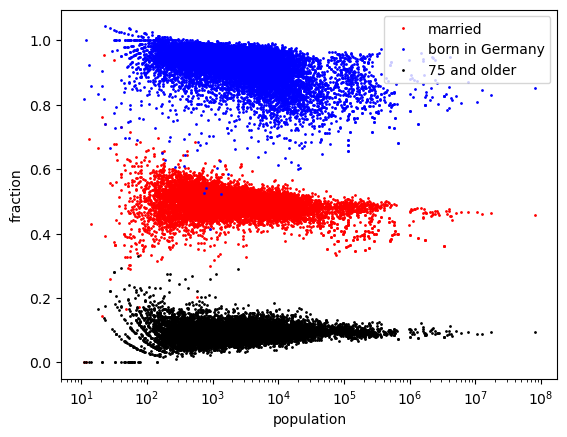

In [9]:

plt.plot(cdf['population'],cdf['married_total']/cdf['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf['population'],cdf['birth_country_germany']/cdf['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf['population'],cdf['total_75_and_older']/cdf['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

However, some of them are unreliable because they were changed for conserving privacy. Below they are displayed. The problems is larger for units with small population and for properties which are rare as fraction of population. 

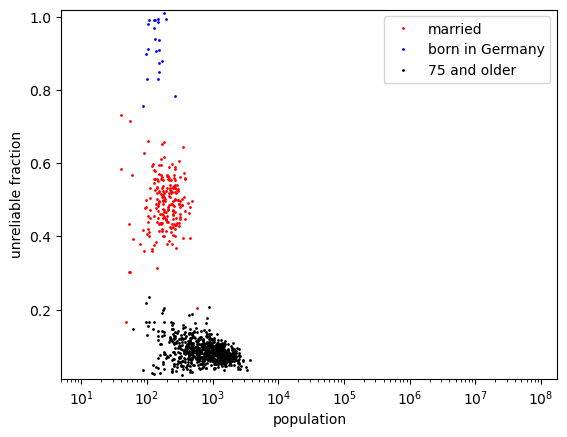

In [10]:

plt.plot(cdf['population'],(cdf['married_total']*cdf['qual_married_total'])/cdf['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf['population'],(cdf['birth_country_germany']*cdf['qual_birth_country_germany'])/cdf['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf['population'],(cdf['total_75_and_older']*cdf['qual_total_75_and_older'])/cdf['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("unreliable fraction")
#plt.yscale("log")
plt.ylim(0.01,1.02)
plt.xscale("log")

Some properties are only available for large units, usually when population is above 10000.

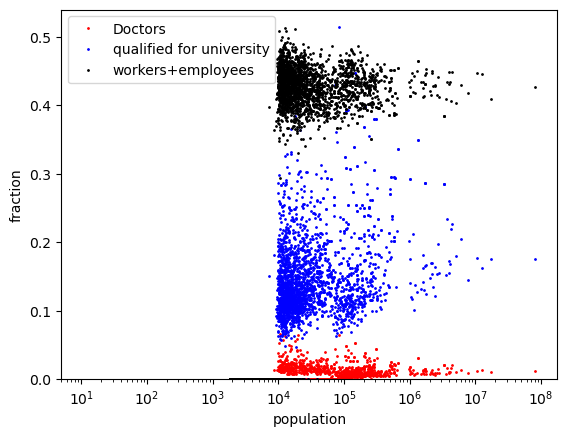

In [11]:
#first plotting takes time 
plt.plot(cdf['population'],cdf['PhD_and_MD']/cdf['population'],'o',ms=1,color='red',label='Doctors') 
plt.plot(cdf['population'],cdf['qualified_for_university']/cdf['population'],'o',ms=1,color='blue',label='qualified for university')
plt.plot(cdf['population'],cdf['worker_employee']/cdf['population'],'o',ms=1,color='black',label='workers+employees')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
plt.ylim(0,0.54)
#plt.yscale("log")
plt.xscale("log")

In [12]:
#could use kreise and substract the cities in them to get some informations also for lower levels

Now we load the federal election data of 2021.

In [356]:
wdf=pd.read_csv(path+"btw21_wbz_ergebnisse.csv",sep=';',low_memory=False,skiprows=[1,1]) #row 1 is kind an additional header row
#it is not read well when included and we anyway need to translate the column names
print(wdf.head)

<bound method NDFrame.head of        Wahlkreis  Land  Regierungsbezirk  Kreis  Verbandsgemeinde  Gemeinde  \
0              1     1                 0      1                 0         0   
1              1     1                 0      1                 0         0   
2              1     1                 0      1                 0         0   
3              1     1                 0      1                 0         0   
4              1     1                 0      1                 0         0   
...          ...   ...               ...    ...               ...       ...   
94663        296    10                 0     41               519       519   
94664        296    10                 0     41               519       519   
94665        296    10                 0     41               519       519   
94666        296    10                 0     41               519       519   
94667        296    10                 0     41               519       519   

      Kennziffer Urne

We are looking on the column names and translate the election system ones and the translate name of the partyies which made it into parliament.

In [14]:

#done ar main parties, voters, not yet level and minore parties
print(wdf.columns[11:30])
wdf.rename(columns={'Wahlberechtigte (A)':'eligible_voters','Wahlberechtigte mit Sperrvermerk (A2)':'eligible_voters_not_locally' ,'Wahlberechtigte ohne Sperrvermerk (A1)':'eligible_voters_locally','Wahlberechtigte nach § 25 Abs. 2 BWO (A3)':'eligile_voters_added','CDU.1':'christian_democrats_party_votes','CDU':'christian_democrats_person_votes','Wählende (B)':'voters' ,'Wählende mit Wahlschein (B1)':'voters_not_local','Ungültige':'not_valid_votes_person_votes','Gültige':'valid_votes_person_votes','Ungültige.1':'not_valid_votes_party_votes','Gültige.1':'valid_votes_party_votes','SPD.1':'social_democrats_party_votes','SPD':'social_democrats_person_votes','CSU.1':'christian_socials_party_votes','CSU':'christian_socials_person_votes','FDP.1':'libertarians_party_votes','FDP':'libertarians_person_votes','DIE LINKE.1':'lefts_party_votes','DIE LINKE':'lefts_person_votes','AfD.1':'alternative_for_germany_party_votes','AfD':'alternative_for_germany_person_votes','GRÜNE.1':'greens_party_votes','GRÜNE':'greens_person_votes',},inplace=True)
print(wdf.columns[11:30])
print(wdf.columns[51:70])

Index(['Wahlberechtigte (A)', 'Wahlberechtigte ohne Sperrvermerk (A1)',
       'Wahlberechtigte mit Sperrvermerk (A2)',
       'Wahlberechtigte nach § 25 Abs. 2 BWO (A3)', 'Wählende (B)',
       'Wählende mit Wahlschein (B1)', 'Ungültige', 'Gültige', 'CDU', 'SPD',
       'AfD', 'FDP', 'DIE LINKE', 'GRÜNE', 'CSU', 'FREIE WÄHLER', 'Die PARTEI',
       'Tierschutzpartei', 'NPD'],
      dtype='object')
Index(['eligible_voters', 'eligible_voters_locally',
       'eligible_voters_not_locally', 'eligile_voters_added', 'voters',
       'voters_not_local', 'not_valid_votes_person_votes',
       'valid_votes_person_votes', 'christian_democrats_person_votes',
       'social_democrats_person_votes', 'alternative_for_germany_person_votes',
       'libertarians_person_votes', 'lefts_person_votes',
       'greens_person_votes', 'christian_socials_person_votes', 'FREIE WÄHLER',
       'Die PARTEI', 'Tierschutzpartei', 'NPD'],
      dtype='object')
Index(['LKR', 'SSW', 'Team Todenhöfer', 'UNABHÄNGIGE',

We now look on the elegible voeters and the fraction of one party.

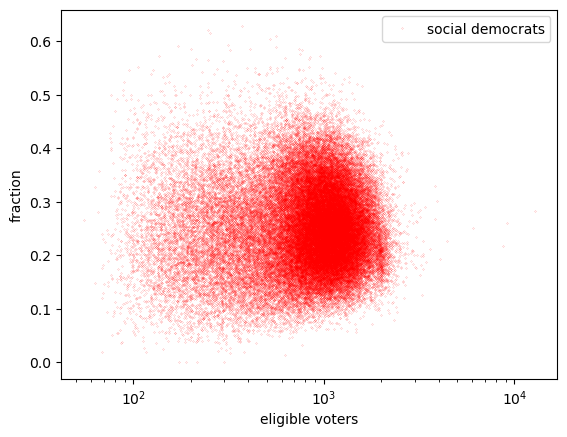

In [15]:
plt.plot(wdf['eligible_voters'],wdf['social_democrats_party_votes']/wdf['valid_votes_party_votes'],'o',ms=0.1,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

The data is per election district. We now group by Gemeinde to get the smallest level possible in the census data. 

Index(['Wahlkreis', 'Land', 'Regierungsbezirk', 'Kreis', 'Verbandsgemeinde',
       'Gemeinde', 'Kennziffer Urnenwahlbezirke nach § 68 BWO',
       'Kennziffer Briefwahlzugehörigkeit', 'Gemeinde Name', 'Wahlbezirk'],
      dtype='object')
(94668, 107)
(10955, 102)
               Wahlkreis  Land  Regierungsbezirk  Kreis  Verbandsgemeinde  \
Gemeinde Name                                                               
Aach               203.0   7.0               2.0   35.0            5007.0   
Aach, Stadt        287.0   8.0               3.0   35.0            5001.0   
Aachen, Stadt       87.0   5.0               3.0   34.0               2.0   
Aalen, Stadt       270.0   8.0               1.0   36.0            5001.0   
Aarbergen          178.0   6.0               4.0   39.0               1.0   
Aasbüttel            3.0   1.0               0.0   61.0            5168.0   
Abenberg, St       246.0   9.0               5.0   76.0             111.0   
Abensberg, St      228.0   9.0            

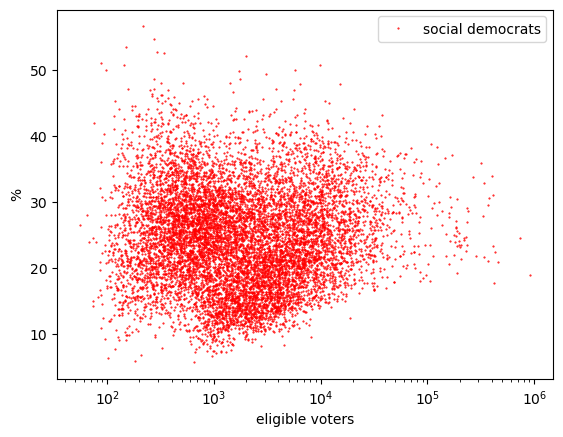

In [16]:
print(wdf.columns[0:10])
print(wdf.shape)
#goup by Gemeinde is either (village,city)  in voter file
wdf2=wdf.groupby(wdf['Gemeinde Name']).sum(numeric_only=True)
#mean is used for numbers which are keys common to Gemeinde
wdf3=wdf.groupby(wdf['Gemeinde Name']).mean(numeric_only=True)#.astype(int)

wdf2['Wahlkreis']=wdf3['Wahlkreis']
wdf2['Land']=wdf3['Land']
wdf2['Regierungsbezirk']=wdf3['Regierungsbezirk']
wdf2['Kreis']=wdf3['Kreis']
wdf2['Verbandsgemeinde']=wdf3['Verbandsgemeinde']
wdf2['Gemeinde']=wdf3['Gemeinde']

print(wdf2.shape)
plt.plot(wdf2['eligible_voters'],100*wdf2['social_democrats_party_votes']/wdf2['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")
print(wdf2.iloc[0:10,0:10])
print(wdf2.columns)

In [17]:
#select only villages in census data
print(cdf.columns)
cdf2=cdf.loc[cdf['Reg_Hier']=='Gemeinde']
#we are also selecting Land and Kreis to make it easier to check name of this ids (this ids are the most important ones
#because they exist for nearly all Gemeinde)
#should be past as additional column for cdf2 also 
cdf3=cdf.loc[cdf['Reg_Hier']=='Stadtkreis/kreisfreie Stadt/Landkreis']
print(cdf3)
cdf4=cdf.loc[cdf['Reg_Hier']=='Land']
cdf4.loc[:,'land_name']=cdf4.loc[:,'Name']#warning but works
cdf4s=cdf4[['RS_Land','land_name']]
cdf4s['unification']='West'  #classify states as existing before and after german unification as east (berlin east here) and west 
cdf4s.unification[cdf4s.RS_Land>10]='East'
print(cdf4s)
#create dictionary of Name and RS_Land to have names of Land in cdf2 
#print(cdf2['Land'])
print(len(cdf2))
cdf2=cdf2.merge(cdf4s,left_on='RS_Land',right_on='RS_Land')  
print(len(cdf2))
#the same for Kreis
cdf3.loc[:,'kreis_name']=cdf3.loc[:,'Name']
#create new kreis-id as key because old is only unique within each Land 
cdf3.loc[:,'kreis_id']=cdf3.loc[:,'RS_Kreis']+100*cdf3.loc[:,'RS_Land']
cdf2.loc[:,'kreis_id']=cdf2.loc[:,'RS_Kreis']+100*cdf2.loc[:,'RS_Land']
cdf3s=cdf3[['kreis_id','kreis_name']]
print(cdf3s)
print(cdf2.kreis_id.isnull().sum())
print(cdf3s.kreis_id.isnull().sum())
print(cdf2.Name[1200:1210])
print(cdf2.loc[1113:1129,['Name','RS_Kreis','land_name','kreis_id','population']])
print(cdf2[cdf2.Name.str.contains('Oldenburg')])
#cdf2=cdf2.merge(cdf3s,left_on='kreis_id',right_on='kreis_id')  somehow second merge does not work for now not done
#print(cdf2.loc[1113:1129,['Name','RS_Kreis','land_name','kreis_id','population']])
print(len(cdf2))
print(len(cdf))
print(cdf2[cdf2.Name.str.contains('Oldenburg')])

Index(['AGS_12', 'RS_Land', 'RS_RB_NUTS2', 'RS_Kreis', 'RS_VB', 'RS_Gemeinde',
       'Name', 'Reg_Hier', 'population', 'gender_total',
       ...
       'qual_qualified_for_community_college', 'qual_qualified_for_university',
       'qual_profession_education_total', 'qual_no_profession_education',
       'qual_apprenticeship', 'qual_professional_school',
       'qual_professional_academy', 'qual_community_college',
       'qual_university', 'qual_PhD_and_MD'],
      dtype='object', length=439)
       AGS_12  RS_Land  RS_RB_NUTS2  RS_Kreis  RS_VB  RS_Gemeinde  \
3        1001        1          0.0       1.0    NaN          NaN   
5        1002        1          0.0       2.0    NaN          NaN   
7        1003        1          0.0       3.0    NaN          NaN   
9        1004        1          0.0       4.0    NaN          NaN   
10       1051        1          0.0      51.0    NaN          NaN   
...       ...      ...          ...       ...    ...          ...   
12192   16073   

/tmp/ipykernel_7437/889639970.py:8: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(cdf3)
/tmp/ipykernel_7437/889639970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf4.loc[:,'land_name']=cdf4.loc[:,'Name']#warning but works
/tmp/ipykernel_7437/889639970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf4s['unification']='West'  #classify states as existing befo

0           Flensburg, Stadt
1     Kiel, Landeshauptstadt
2         Lübeck, Hansestadt
3          Neumünster, Stadt
4         Brunsbüttel, Stadt
5               Heide, Stadt
6                    Averlak
7                   Brickeln
8                   Buchholz
9        Burg (Dithmarschen)
10                    Dingen
11                   Eddelak
12                  Eggstedt
13                  Frestedt
14                Großenrade
15                  Hochdonn
16                     Kuden
17                 Quickborn
18       Sankt Michaelisdonn
19              Süderhastedt
Name: Name, dtype: object


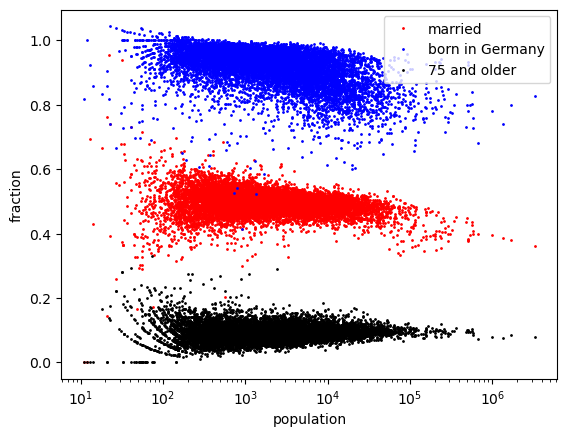

In [18]:
print(cdf2.Name[0:20])
plt.plot(cdf2['population'],cdf2['married_total']/cdf2['population'],'o',ms=1,color='red',label='married') 
plt.plot(cdf2['population'],cdf2['birth_country_germany']/cdf2['population'],'o',ms=1,color='blue',label='born in Germany')
plt.plot(cdf2['population'],cdf2['total_75_and_older']/cdf2['population'],'o',ms=1,color='black',label='75 and older')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("fraction")
#plt.yscale("log")
plt.xscale("log")

That gets about the same range of populations. There are some differences, at both ends. Very small villages are missing in the election data. They are likely in lkkarger villages included. Probably, they are not so important, since their overall population is small and also the census data on them not so useful. 

On the other end there are larger cities in the population data than in the election data. The largest two cities Hamburg and Berlin are thus certainly split up in the election data. We are also checking other large cities.

In [19]:
print(wdf2[(wdf2['eligible_voters']>300000)])  #usually only teil , probably wahlkreis
print(wdf2[(wdf2['eligible_voters']>150000)]) 
#still trying to find mmacthes in Name
#print(wdf2.str.contain(wdf2['Gemeinde Name'==Frankfurt]))
#print(cdf2)
print(cdf2[cdf2.Name.str.contains('Frankfurt')])
print(wdf2[wdf2.index.str.contains('Frankfurt')])
print(wdf[wdf['Gemeinde Name'].str.contains('Frankfurt am')])
#is complte it is just that teil are removed

                                                     Wahlkreis  Land  \
Gemeinde Name                                                          
Bremen, Stadt (Teil)                                 54.365854   4.0   
Dortmund, Stadt (Teil)                              142.493849   5.0   
Dresden, Stadt (Teil)                               159.460573  14.0   
Duisburg, Stadt (Teil)                              115.474299   5.0   
Düsseldorf, Stadt (Teil)                            106.458525   5.0   
Essen, Stadt (Teil)                                 119.314159   5.0   
Frankfurt am Main, Stadt (Teil)                     182.528696   6.0   
Hamburg, Freie und Hansestadt, Bezirk Hamburg-N...   20.401089   2.0   
Hamburg, Freie und Hansestadt, Bezirk Wandsbek ...   21.827977   2.0   
Hannover, Landeshauptstadt (Teil)                    41.521561   3.0   
Köln, Stadt (Teil)                                   94.922023   5.0   
Leipzig, Stadt (Teil)                               152.516295  

In [20]:
wdf2.reset_index(inplace=True)

#print(wdf2)
#there is still {Teil}  \(Teil\) does not work, works even less
#wdf2['Gemeinde Name']=wdf2['Gemeinde Name'].replace('\(Teil\)','')
#print(wdf2[wdf2['Gemeinde Name'].str.contains('Frankfurt')])
#automatic does not work, thus per hand 
s=wdf2[wdf2['Gemeinde Name'].str.contains('(Teil)')]
s1=wdf2[wdf2['Gemeinde Name'].str.contains('Hamburg')]
s2=wdf2[wdf2['Gemeinde Name'].str.contains('Berlin')]
print(s['Gemeinde Name'])
print(s1['Gemeinde Name'])
print(s2['Gemeinde Name'])
print(s1.columns.get_loc('Gemeinde Name'))
print(wdf2.iloc[823:837,0])
#change the names 
#wdf2.iloc[823:837,0]='Berlin, Stadt'  not anymore because double grouing seems not work 
#wdf2.iloc[4126:4132,0]='Hamburg, Freie und Hansestadt'  
wdf2.iloc[1049,0]='Bochum, Stadt'
wdf2.iloc[1230,0]='Bremen, Stadt'
wdf2.iloc[2513,0]='Dortmund, Stadt'
wdf2.iloc[2547,0]='Dresden, Stadt'
wdf2.iloc[2623,0]='Düsseldorf, Stadt'
wdf2.iloc[3012,0]='Essen, Stadt'
wdf2.iloc[3214,0]='Frankfurt am Main, Stadt'
wdf2.iloc[4160,0]='Hannover, Landeshauptstadt'
wdf2.iloc[5485,0]='Krefeld, Stadt'
wdf2.iloc[5607,0]='Köln, Stadt'
wdf2.iloc[5896,0]='Leipzig, Stadt'
wdf2.iloc[6741,0]='München, Landeshauptstadt, Stadt'
wdf2.iloc[7239,0]='Nürnberg, Stadt'
wdf2.iloc[9423,0]='Stuttgart, Landeshauptstadt'
wdf2.iloc[10766,0]='Wuppertal, Stadt'

823      Berlin, Stadt, Bezirk Charlottenburg-Wilmersdo...
831                    Berlin, Stadt, Bezirk Pankow (Teil)
1049                                  Bochum, Stadt (Teil)
1230                                  Bremen, Stadt (Teil)
2513                                Dortmund, Stadt (Teil)
2547                                 Dresden, Stadt (Teil)
2561                                Duisburg, Stadt (Teil)
2623                              Düsseldorf, Stadt (Teil)
3012                                   Essen, Stadt (Teil)
3214                       Frankfurt am Main, Stadt (Teil)
4128     Hamburg, Freie und Hansestadt, Bezirk Hamburg-...
4129     Hamburg, Freie und Hansestadt, Bezirk Hamburg-...
4131     Hamburg, Freie und Hansestadt, Bezirk Wandsbek...
4160                     Hannover, Landeshauptstadt (Teil)
5485                                 Krefeld, Stadt (Teil)
5607                                    Köln, Stadt (Teil)
5896                                 Leipzig, Stadt (Tei

/tmp/ipykernel_7437/172987969.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s=wdf2[wdf2['Gemeinde Name'].str.contains('(Teil)')]


In [21]:
#check whether it worked
print(s2['Land'])
print(wdf2.iloc[823,0])
print(wdf2.shape)
#now group gain by name of Hamburg and Berlin  
#does not work 
#wdf4=wdf.groupby(wdf2['Gemeinde Name']).sum(numeric_only=True)
#mean is used for numbers which are keys common to Gemeinde
#wdf4b=wdf.groupby(wdf2['Gemeinde Name']).mean(numeric_only=True)#.astype(int)
#wdf4['Wahlkreis']=wdf4b['Wahlkreis']
#wdf4['Land']=wdf4b['Land']
#wdf4['Regierungsbezirk']=wdf4b['Regierungsbezirk']
#wdf4['Kreis']=wdf3['Kreis']
#wdf4['Verbandsgemeinde']=wdf4b['Verbandsgemeinde']
#wdf4['Gemeinde']=wdf4b['Gemeinde']
#print(wdf4.shape)
#wdf4.reset_index(inplace=True)
#s3=wdf4[wdf4['Gemeinde Name'].str.contains('Berlin')]
#print(s3['Gemeinde Name'])

823     11.0
824     11.0
825     11.0
826     11.0
827     11.0
828     11.0
829     11.0
830     11.0
831     11.0
832     11.0
833     11.0
834     11.0
835     11.0
836     11.0
837      7.0
838     16.0
844     12.0
6906    12.0
8466    12.0
8930    12.0
Name: Land, dtype: float64
Berlin, Stadt, Bezirk Charlottenburg-Wilmersdorf (Teil)
(10955, 103)


In [22]:
#wdf4 numbers are wrong, thus isnstead just add coumns to wdf 2
#wdf2.iloc[823:837,0]='Berlin, Stadt'
#wdf2.iloc[4126:4132,0]='Hamburg, Freie und Hansestadt'
ber=wdf2.iloc[823:837,:].sum()
c=wdf2.iloc[823:837,0].count()
print(c)
#change name and keys 
ber['Gemeinde Name']='Berlin, Stadt'
ber['Wahlkreis']=ber['Wahlkreis']/c
ber['Land']=ber['Land']/c
ber['Regierungsbezirk']=ber['Regierungsbezirk']/c
ber['Kreis']=ber['Kreis']/c
ber['Verbandsgemeinde']=ber['Verbandsgemeinde']/c
ber['Gemeinde']=ber['Gemeinde']/c
print(ber)
#same for hamburg
ham=wdf2.iloc[4126:4132,:].sum()
c=wdf2.iloc[4126:4132,0].count()
print(c)
#change name and keys 
ham['Gemeinde Name']='Hamburg, Freie und Hansestadt'
ham['Wahlkreis']=ham['Wahlkreis']/c
ham['Land']=ham['Land']/c
ham['Regierungsbezirk']=ham['Regierungsbezirk']/c
ham['Kreis']=ham['Kreis']/c
ham['Verbandsgemeinde']=ham['Verbandsgemeinde']/c
ham['Gemeinde']=ham['Gemeinde']/c
print(ham)
wdf2 = wdf2.append(ber, ignore_index=True)
wdf2 = wdf2.append(ham, ignore_index=True)
print(wdf2)
#append to wdf2 

  
#new_row = {'Name':'Dev','Subj':'comp','Marks':100}
 
#new_row2 = {'Name':'Jack','Subj':'Math','Marks':100}
  
#df_studs = df_studs.append(new_row, ignore_index=True)
#df_studs = df_studs.append(new_row2, ignore_index=True)

14
Gemeinde Name        Berlin, Stadt
Wahlkreis                80.364728
Land                          11.0
Regierungsbezirk          1.571429
Kreis                     5.785714
                         ...      
LfK                              0
SSW.1                            0
Team Todenhöfer.1            20168
UNABHÄNGIGE.1                    0
Volt.1                       11645
Length: 103, dtype: object
6
Gemeinde Name        Hamburg, Freie und Hansestadt
Wahlkreis                                20.871511
Land                                           2.0
Regierungsbezirk                               0.0
Kreis                                      4.21673
                                 ...              
LfK                                              0
SSW.1                                            0
Team Todenhöfer.1                             8952
UNABHÄNGIGE.1                                    0
Volt.1                                        5429
Length: 103, dtype: ob

/tmp/ipykernel_7437/4118422962.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wdf2 = wdf2.append(ber, ignore_index=True)
/tmp/ipykernel_7437/4118422962.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wdf2 = wdf2.append(ham, ignore_index=True)


In [24]:
#print(s3[['eligible_voters','Wahlkreis']])
print(s2[['eligible_voters','Wahlkreis']])
#wdf4 numbers are wrong 
print(wdf4.shape)
plt.plot(wdf2['eligible_voters'],100*wdf2['social_democrats_party_votes']/wdf2['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("eligible voters")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")

      eligible_voters   Wahlkreis
823            217663   79.795014
824             85985   83.000000
825             84568   83.000000
826            200673   86.000000
827            197988   85.000000
828             58888   75.000000
829            148595   75.000000
830            197037   82.000000
831            285108   77.311178
832            176585   77.000000
833            159388   78.000000
834            217814   79.000000
835            231500   81.000000
836            207127   84.000000
837               187  202.000000
838               991  189.000000
844             33412   59.000000
6906            15521   59.000000
8466            13011   59.000000
8930            10608   63.000000


NameError: name 'wdf4' is not defined

In [25]:
#print(wdf4.shape)
#merging seems random
comb1=cdf2.merge(wdf2,left_on='Name',right_on='Gemeinde Name')  
print(comb1.shape)

(10024, 545)


2383    Frankfurt am Main, Stadt
7917     Frankfurt (Oder), Stadt
Name: Name, dtype: object
74002531


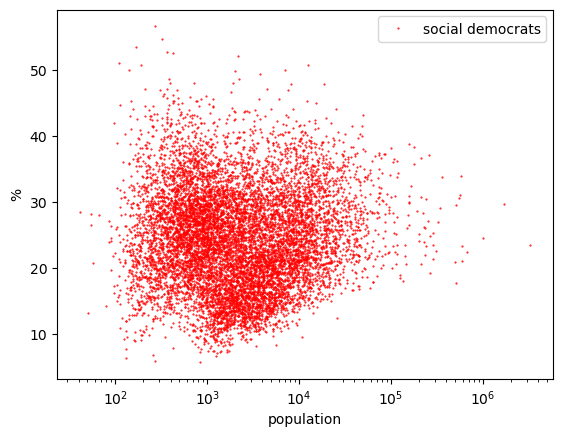

In [26]:
plt.plot(comb1['population'],100*comb1['social_democrats_party_votes']/comb1['valid_votes_party_votes'],'o',ms=0.5,color='red',label='social democrats') 
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
#plt.yscale("log")
plt.xscale("log")
#now it works 
s3=comb1[comb1['Name'].str.contains('Frankfurt')]
print(s3['Name'])
print(comb1.population.sum()) #some misisng only 74 millions

Checking the possible voters should be better way to check for problems. 

number of communities 10024
number of communities between factor 0.5 and 2: 9673


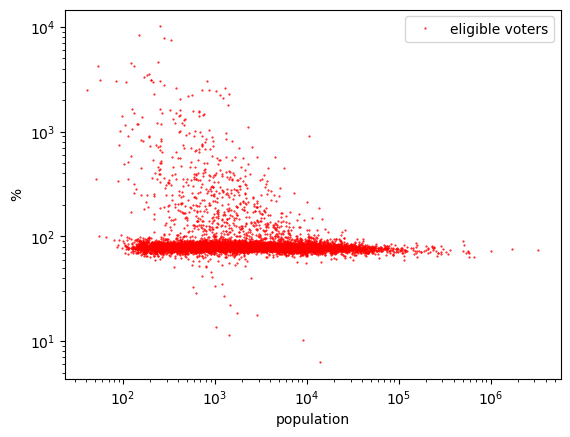

In [27]:
#but below something is wrong
plt.plot(comb1['population'],100*comb1['eligible_voters']/comb1['population'],'o',ms=0.5,color='red',label='eligible voters') 
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
plt.yscale("log")
plt.xscale("log")
print(f"number of communities {len(comb1.population)}")
print(f"number of communities between factor 0.5 and 2: {comb1.population[(comb1['eligible_voters']/comb1['population']>0.5) & (comb1['eligible_voters']/comb1['population']<2)].count()}")

Most seem have worked. Some not, but they are rather small and are thus more likely affected by different units for election and census. As expected there are problems at the high end, where cities are larger as election districts. 

median is 79.4048633117967
16% quantile is 75.07201490728181
84% quantile is 85.21815385442714
2.5% quantile is 69.47204479307597
97.5% quantile is 274.43423181086104
57.31236363636365


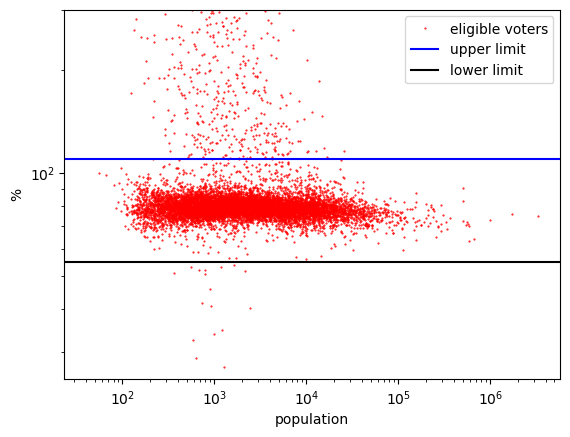

In [28]:
plt.plot(comb1['population'],100*comb1['eligible_voters']/comb1['population'],'o',ms=0.5,color='red',label='eligible voters') 
plt.axhline(y=110, color='b', linestyle='-', label='upper limit')
plt.axhline(y=55, color='k', linestyle='-', label='lower limit')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("%")
plt.yscale("log")
plt.xscale("log")
plt.ylim(25,300)
print(f"median is {np.median(100*comb1['eligible_voters']/comb1['population'])}")
print(f"16% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],0.1585)}")
print(f"84% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],1-0.1585)}")
print(f"2.5% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],0.025)}")
print(f"97.5% quantile is {np.quantile(100*comb1['eligible_voters']/comb1['population'],1-0.025)}")
print(79.4/(110/79.4))
#range of 55 to 110 by looking is also rather symmetric on median
#in principlee should be german over 18 but is less complete

We are now looking on the valid votes as function of voters. That checks for communities were votes are mssing because the mail votes were counted elsewhere. Since it is known that the mail votes is diffent, those communities are best excluded.

number of communities in census + election data 10024
number of communities in census + election data after excluding population miss matches 9395
number of communities in census + election data after also excluding mssing mail votes 5088
population in census + election data 74002531
population in census + election data after excluding population miss matches 72898464
population in census + election data after also excluding mssing mail votes 67862782


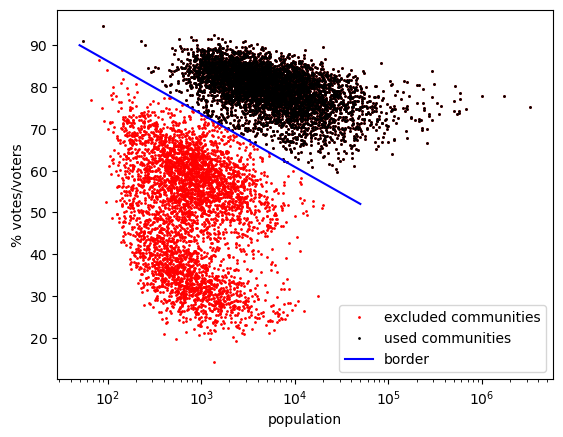

In [29]:
sel=comb1[(abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]
sel2=comb1[(abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5) & (100*comb1['voters']/comb1['eligible_voters']>90-38/3*np.log10(comb1['population']/50))]
li=np.zeros((2,2))
li[0,0]=90
li[0,1]=52
li[1,1]=50000
li[1,0]=50
plt.plot(sel['population'],100*sel['voters']/sel['eligible_voters'],'o',ms=1,color='red',label='excluded communities')
plt.plot(sel2['population'],100*sel2['voters']/sel2['eligible_voters'],'o',ms=1,color='black',label='used communities')
plt.plot(li[1],li[0],'-',ms=1,color='blue',label='border')
plt.legend(loc="best")
plt.xlabel("population")
plt.ylabel("% votes/voters")
#plt.xlim(0,30000)
plt.xscale("log")
print(f"number of communities in census + election data {len(comb1)}")
print(f"number of communities in census + election data after excluding population miss matches {len(sel)}")
print(f"number of communities in census + election data after also excluding mssing mail votes {len(sel2)}")

print(f"population in census + election data {comb1.population.sum()}")
print(f"population in census + election data after excluding population miss matches {sel.population.sum()}")
print(f"population in census + election data after also excluding mssing mail votes {sel2.population.sum()}")

In [30]:
print(wdf2.columns[10:30])

Index(['eligible_voters_not_locally', 'eligile_voters_added', 'voters',
       'voters_not_local', 'not_valid_votes_person_votes',
       'valid_votes_person_votes', 'christian_democrats_person_votes',
       'social_democrats_person_votes', 'alternative_for_germany_person_votes',
       'libertarians_person_votes', 'lefts_person_votes',
       'greens_person_votes', 'christian_socials_person_votes', 'FREIE WÄHLER',
       'Die PARTEI', 'Tierschutzpartei', 'NPD', 'PIRATEN', 'ÖDP', 'V-Partei³'],
      dtype='object')


The total population is about 8 than in should. We now check whather the reason is concentrated in some states (land) or whether it is more a random problem.

Text(0, 0.5, 'completenss in election data %')

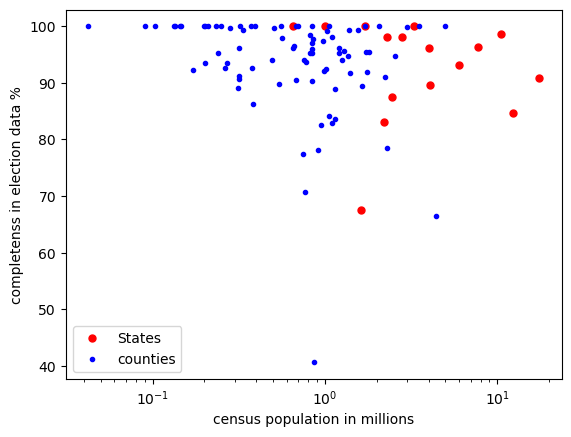

In [31]:
t=cdf2.population.groupby(cdf2['RS_Land']).sum()
u=comb1.population.groupby(comb1['RS_Land']).sum()
t2=cdf2.population.groupby(cdf2['RS_Kreis']).sum()
u2=comb1.population.groupby(comb1['RS_Kreis']).sum()
plt.plot(t/10**6,100*u/t,'o',ms=5,color='red',label='States') 
plt.plot(t2/10**6,100*u2/t2,'o',ms=3,color='blue',label='counties') 
plt.legend(loc="best")
plt.xscale("log")
plt.xlabel("census population in millions")
plt.ylabel("completenss in election data %")
#could look more on reasons, but not for now 
#hamburg berlin are double in it

There is variation between the states, but all have at least 65% completeness. On the county level the completeness is at least 40%.

Now we are looking in other census data. 

51943069
51664599


Text(0, 0.5, '% christain unions')

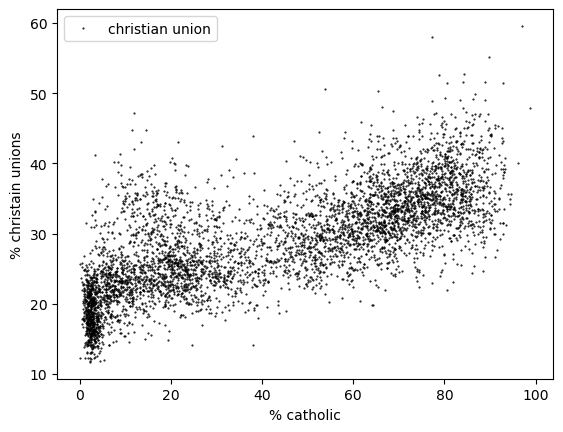

In [33]:
print(sel2.eligible_voters.sum())
print(sel2.eligible_voters[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)].sum())

plt.plot(100*sel2['religion_catholic']/sel2['population'],100*(sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes'])/sel2['valid_votes_party_votes'],'o',ms=0.5,color='black',label='christian union') 
plt.legend(loc="best")
plt.xlabel("% catholic")
plt.ylabel("% christain unions")
#plt.yscale("log")
#plt.xscale("log")

As expected there are more votes for christian union where a large part is catholic.

We are now checking for quality of the zensus properties, we always exclude already the communities for which the election data is bad.

In [34]:
print(f"total eligible voters {sel2.eligible_voters.sum()}")
print(f"total catholic numbers {sel2.eligible_voters[(sel2.religion_catholic>-0.5)].sum()}")
print(f"total reliable catholic numbers {sel2.eligible_voters[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)].sum()}")
#now automatic
print(sel2['qual_'+column_names[9]])
print(len(column_names))
stat=np.zeros((9,223))
stat[1,:]=sel2.eligible_voters.sum()
stat[4,:]=sel2.eligible_voters.count()
for i in range (8, 223):
    print(i)
    stat[0,i]=i
    stat[2,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5)].sum()
    stat[3,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].sum()  
    stat[5,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5)].count()
    stat[6,i]=sel2.eligible_voters[(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].count()
    stat[7,i]=sel2[column_names[i]][(sel2[column_names[i]]>-0.5)].sum() 
    stat[8,i]=sel2[column_names[i]][(sel2[column_names[i]]>-0.5) & (sel2['qual_'+column_names[i]]!=1)].sum()     
print(stat[:,7:12]) 
print(max(stat[7]))

total eligible voters 51943069
total catholic numbers 51943069
total reliable catholic numbers 51664599
0       0
1       0
2       0
3       0
4       0
       ..
9989    0
9995    0
9996    0
9997    0
9998    0
Name: qual_gender_total, Length: 5088, dtype: int64
223
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


Text(0, 0.5, '% of eligible voters w information')

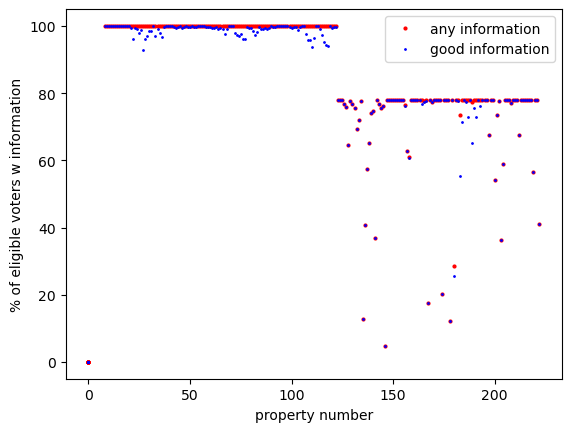

In [35]:
plt.plot(stat[0],100*stat[2]/stat[1],'o',ms=2,color='red',label='any information') 
plt.plot(stat[0],100*stat[3]/stat[1],'o',ms=1,color='blue',label='good information') 
plt.legend(loc="best")
plt.xlabel("property number")
plt.ylabel("% of eligible voters w information")

[5088. 5088. 5088. 1462. 1462. 1458. 1400. 1366.  986. 1447.]
including 122 there is most information there


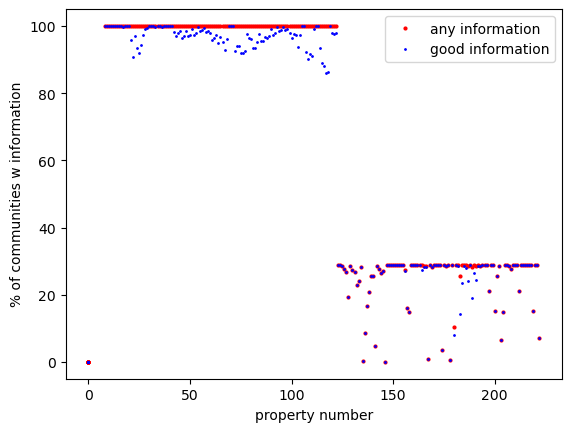

In [36]:
plt.plot(stat[0],100*stat[5]/stat[4],'o',ms=2,color='red',label='any information') 
plt.plot(stat[0],100*stat[6]/stat[4],'o',ms=1,color='blue',label='good information') 
plt.legend(loc="best")
plt.xlabel("property number")
plt.ylabel("% of communities w information")
print(stat[5,120:130])
print("including 122 there is most information there")

The information is mostly property 123. Therefore, we are now looking on all properties in columns 8 to 123. We will exclude the ones which are on properties which non voters like non citizen and citizens below 18, duplicates and properties which just summraize for how of one category there is any information. There are also two grouping in total, we use which has one border below 17.

In [37]:
for i in range(8,123):
    print(f"{i} {column_names[i]}")
    #list to include
pop=np.zeros((3,57))
pop[2]=np.arange(0,57,1)
print(pop[2])
listg1=column_names[10:12]
pop[0,0:2]=stat[8,10:12]
for i in range (15, 39):
    listg1.append(column_names[i])
    pop[0,2+(i-15)]=stat[8,i]
for i in range (84, 105):
    listg1.append(column_names[i])
    pop[0,26+(i-84)]=stat[8,i]    
listg1.append(column_names[106])
pop[0,47]=stat[8,106] 
for i in range (113, 119):
    listg1.append(column_names[i])
    pop[0,48+(i-113)]=stat[8,i] 
for i in range (120, 123):
    listg1.append(column_names[i])
    pop[0,54+(i-120)]=stat[8,i]     
print(listg1)
print(f"number of properties is {len(listg1)}")
#get fraction of total population
pop[1]=pop[0]/sel2.population.sum()
print(f"smallest population fraction {min(pop[1])}")
print(f"largest population fraction {max(pop[1])}")

8 population
9 gender_total
10 male
11 female
12 marital_status_total
13 marital_status_male
14 marital_status_female
15 single_total
16 single_male
17 single_female
18 married_total
19 married_male
20 married_female
21 widowed_total
22 widowed_male
23 widowed_female
24 divorced_total
25 divorced_male
26 divorced_female
27 civil_union_total
28 civil_union_male
29 civil_union_female
30 civil_union_widowed_total
31 civil_union_widowed_male
32 civil_union_widowed_female
33 civil_union_divorced_total
34 civil_union_divorced_male
35 civil_union_divorved_female
36 not_specified_total
37 not_specified_male
38 not_specified_female
39 age_groups1_total
40 age_groups1_male
41 age_groups1_female
42 0_9_total
43 0_9_male
44 0_9_female
45 10_19_total
46 10_19_male
47 10_19_female
48 20_29_total
49 20_29_male
50 20_29_female
51 30_39_total
52 30_39_male
53 30_39_female
54 40_49_total
55 40_49_male
56 40_49_female
57 50_59_total
58 50_59_male
59 50_59_female
60 60_69_total
61 60_69_male
62 60_69_fema

That includes marital status data, age data, citizen data and religion data. It does not include more detailed migration data, economic or eduction data

We are now calculating the correlation for all of them and the votes of the 6 major parties which made it into parliamentand the total of the minor parties. The two christian partiesare summarized as usual, since do no compete in states and form one parlimentary group.

In [38]:
#combining the two christain unions
comb1['christian_unions_party_votes']=comb1['christian_socials_party_votes']+comb1['christian_democrats_party_votes']
comb1['christian_unions_person_votes']=comb1['christian_socials_person_votes']+comb1['christian_democrats_person_votes']
sel2['christian_unions_party_votes']=sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes']
sel2['christian_unions_person_votes']=sel2['christian_socials_person_votes']+sel2['christian_democrats_person_votes']


/tmp/ipykernel_7437/205160679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['christian_unions_party_votes']=sel2['christian_socials_party_votes']+sel2['christian_democrats_party_votes']
/tmp/ipykernel_7437/205160679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['christian_unions_person_votes']=sel2['christian_socials_person_votes']+sel2['christian_democrats_person_votes']


In [39]:
#get other parties total by using valid votes minus main parties
comb1['others_party_votes']=comb1['valid_votes_party_votes']-comb1['christian_unions_party_votes']-comb1['social_democrats_party_votes']-comb1['alternative_for_germany_party_votes']-comb1['libertarians_party_votes']-comb1['greens_party_votes']-comb1['lefts_party_votes']
comb1['others_person_votes']=comb1['valid_votes_person_votes']-comb1['christian_unions_person_votes']-comb1['social_democrats_person_votes']-comb1['alternative_for_germany_person_votes']-comb1['libertarians_person_votes']-comb1['greens_person_votes']-comb1['lefts_person_votes']
sel2['others_party_votes']=sel2['valid_votes_party_votes']-sel2['christian_unions_party_votes']-sel2['social_democrats_party_votes']-sel2['alternative_for_germany_party_votes']-sel2['libertarians_party_votes']-sel2['greens_party_votes']-sel2['lefts_party_votes']
sel2['others_person_votes']=sel2['valid_votes_person_votes']-sel2['christian_unions_person_votes']-sel2['social_democrats_person_votes']-sel2['alternative_for_germany_person_votes']-sel2['libertarians_person_votes']-sel2['greens_person_votes']-sel2['lefts_person_votes']


/tmp/ipykernel_7437/3306810407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['others_party_votes']=sel2['valid_votes_party_votes']-sel2['christian_unions_party_votes']-sel2['social_democrats_party_votes']-sel2['alternative_for_germany_party_votes']-sel2['libertarians_party_votes']-sel2['greens_party_votes']-sel2['lefts_party_votes']
/tmp/ipykernel_7437/3306810407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2['others_person_votes']=sel2['valid_votes_person_votes']-sel2['christian_unions

In [40]:
# checking the princple before doing all
sel=sel2[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)]
s1=sel['christian_unions_party_votes']/sel['eligible_voters']
s2=sel['religion_catholic']/sel['population']
s3=sel['religion_protestant']/sel['population']
s4=sel['religion_other']/sel['population']
corr2=s1.corr(s2, method='pearson')
corr3=s1.corr(s3, method='pearson')
corr4=s1.corr(s4, method='pearson')
print(corr2)
print(corr3)
print(corr4)

0.7374684917904923
-0.3495756491306654
-0.7107357883117962


In [43]:
#list of parties and voters
listp=['voters','not_valid_votes_party_votes','valid_votes_party_votes','christian_unions_party_votes','social_democrats_party_votes','alternative_for_germany_party_votes',
'libertarians_party_votes', 'lefts_party_votes','greens_party_votes','others_party_votes']
print(listp)
sel=sel2[(sel2.religion_catholic>-0.5) & (sel2.qual_religion_catholic!=1)]
#now turn out
s1=sel[listp[0]]/sel['eligible_voters']
s2=sel['religion_catholic']/sel['population']
s3=sel['religion_protestant']/sel['population']
s4=sel['religion_other']/sel['population']
corr2=s1.corr(s2, method='pearson')
corr3=s1.corr(s3, method='pearson')
corr4=s1.corr(s4, method='pearson')
print(corr2)
print(corr3)
print(corr4)
print(len(listp))
print(len(listg1))

['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
0.4294149464644522
-0.13835207317069764
-0.4821021176070483
10
57


In [42]:
#gruene saarland missing in state? 
corr1=np.zeros((10,57))
for i in range(10):
    print(i)
    for j in range(57):
        sel=sel2[(comb1[listg1[j]]>-0.5) & (comb1['qual_'+listg1[j]]!=1)]
        s1=sel[listp[i]]/sel['eligible_voters']
        s2=sel[listg1[j]]/sel['population']
        corr1[i,j]=s1.corr(s2, method='pearson')


0


/tmp/ipykernel_7437/3035649683.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sel=sel2[(comb1[listg1[j]]>-0.5) & (comb1['qual_'+listg1[j]]!=1)]


1
2
3
4
5
6
7
8
9


In [44]:

for i in range(10):
    print(listp[i])
    print(f"max pos correlation of {round(np.max(corr1[i,:]),4)} at {listg1[np.argmax(corr1[i,:])]}")
    print(f"max neg correlation of {round(np.min(corr1[i,:]),4)} at {listg1[np.argmin(corr1[i,:])]}")
    print(f"no correlation of {round(np.min(abs(corr1[i,:])),4)} at {listg1[np.argmin(abs(corr1[i,:]))]}")   

#valid votes very similar to votes becuase few invalid and both relative to eligible voters

voters
max pos correlation of 0.4294 at religion_catholic
max neg correlation of -0.5242 at divorced_total
no correlation of 0.0003 at male_30_39
not_valid_votes_party_votes
max pos correlation of 0.3385 at religion_other
max neg correlation of -0.336 at religion_catholic
no correlation of 0.0002 at civil_union_divorved_female
valid_votes_party_votes
max pos correlation of 0.4424 at religion_catholic
max neg correlation of -0.5246 at divorced_total
no correlation of 0.002 at civil_union_divorced_male
christian_unions_party_votes
max pos correlation of 0.7375 at religion_catholic
max neg correlation of -0.7167 at religion_other
no correlation of 0.0028 at civil_union_divorced_male
social_democrats_party_votes
max pos correlation of 0.5075 at religion_protestant
max neg correlation of -0.4921 at religion_catholic
no correlation of 0.0065 at civil_union_widowed_female
alternative_for_germany_party_votes
max pos correlation of 0.5574 at religion_other
max neg correlation of -0.4215 at sing

The smallest absolute correlation is usually for properties which are rare like civil union (same sex civil union) related or not specified marital status. It is not clear that these properties do not correlate with voters pattern, because it is possible that the others more common properties just add so much 'noise', that it cannot be measured in single factor analysis. One of the strongest factors (with both signs) are religion. Partly, that is caused because other relgion of none is much more common in the east of germany, partly that is due one of origin of the christian unions. Other relations are more surprsing like that the strongest of libertarians is for birth country other europe. Since this group is small and many of them cannot vote, it is possible that it is proxy for another property, possible economic which is not included. 

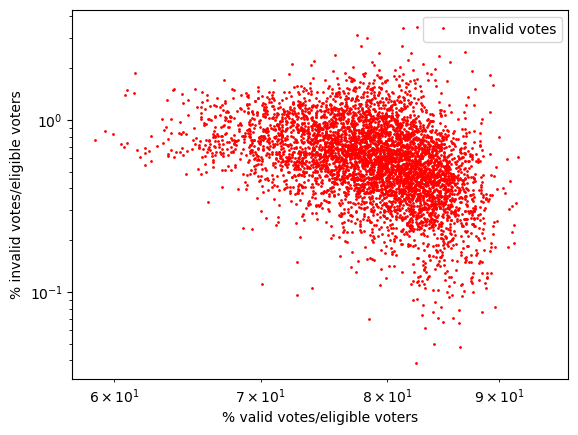

In [45]:

plt.plot(100*sel2['valid_votes_party_votes']/sel2['eligible_voters'],100*sel2['not_valid_votes_party_votes']/sel2['eligible_voters'],'o',ms=1,color='red',label='invalid votes') 
plt.legend(loc="best")
plt.xlabel("% valid votes/eligible voters")
plt.ylabel("% invalid votes/eligible voters")
plt.xscale("log")
plt.yscale("log")


['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


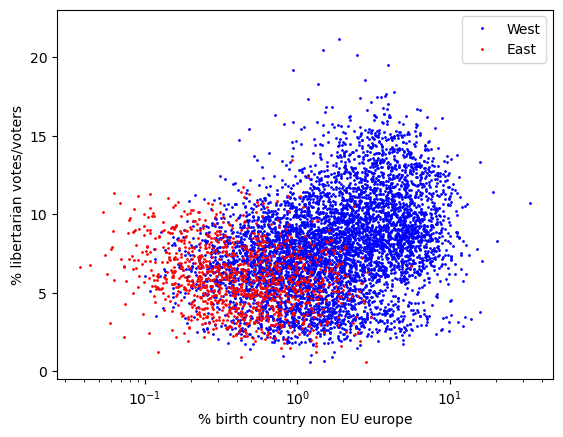

In [49]:
#libetertarian biggest correlation
print(listp)
sele=comb1[(comb1.unification=='East') & (comb1.birth_country_other_europe>-0.5) & (comb1.qual_birth_country_other_europe!=1) & (abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]
selw=comb1[(comb1.unification=='West') & (comb1.birth_country_other_europe>-0.5) & (comb1.qual_birth_country_other_europe!=1) & (abs(100*comb1['eligible_voters']/comb1['population']-82.5)<27.5)]

plt.plot(100*selw['birth_country_other_europe']/selw['population'],100*selw['libertarians_party_votes']/selw['eligible_voters'],'o',ms=1,color='blue',label='West')
plt.plot(100*sele['birth_country_other_europe']/sele['population'],100*sele['libertarians_party_votes']/sele['eligible_voters'],'o',ms=1,color='red',label='East')
plt.legend(loc="best")
plt.xlabel("% birth country non EU europe")
plt.ylabel("% libertarian votes/voters")
plt.xscale("log")

There is really a correlation between birth country and libertarian vote share and it is not only caused by east and west differences, since the trend is also visible within the west. 

We now look on the impact of a property relative to its share. First for voter properties. 

['voters', 'not_valid_votes_party_votes', 'valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


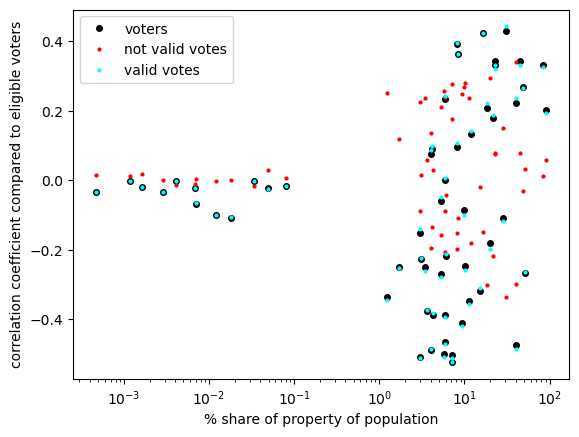

In [50]:
print(listp)
plt.plot(100*pop[1],corr1[0],'o',ms=4,color='black',label='voters') 
plt.plot(100*pop[1],corr1[1],'o',ms=2,color='red',label='not valid votes') 
plt.plot(100*pop[1],corr1[2],'o',ms=2,color='cyan',label='valid votes') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("correlation coefficient compared to eligible voters")
plt.xscale("log")
#plt.yscale("log")

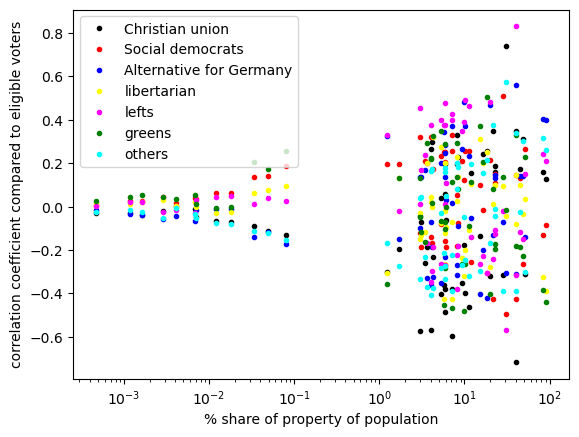

In [51]:
plt.plot(100*pop[1],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(100*pop[1],(corr1[4]),'o',ms=3,color='red',label='Social democrats') 
plt.plot(100*pop[1],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(100*pop[1],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(100*pop[1],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(100*pop[1],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(100*pop[1],corr1[9],'o',ms=3,color='cyan',label='others') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("correlation coefficient compared to eligible voters")
plt.xscale("log")

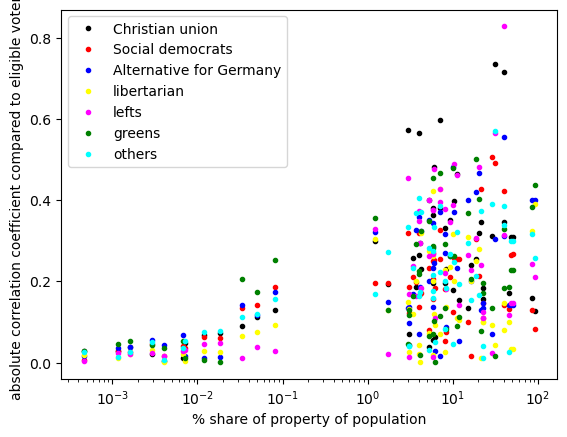

In [52]:
plt.plot(100*pop[1],abs(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(100*pop[1],abs(corr1[4]),'o',ms=3,color='red',label='Social democrats') 
plt.plot(100*pop[1],abs(corr1[5]),'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(100*pop[1],abs(corr1[6]),'o',ms=3,color='yellow',label='libertarian') 
plt.plot(100*pop[1],abs(corr1[7]),'o',ms=3,color='magenta',label='lefts') 
plt.plot(100*pop[1],abs(corr1[8]),'o',ms=3,color='green',label='greens') 
plt.plot(100*pop[1],abs(corr1[9]),'o',ms=3,color='cyan',label='others') 
plt.legend(loc="best")
plt.xlabel("% share of property of population")
plt.ylabel("absolute correlation coefficient compared to eligible voters")
plt.xscale("log")

In general the properties with really small sahre have a small influence. Possible also the influence of properties above 80 decreases again. We now look on the median influence in the table below. 

In [53]:
for i in range(len(listg1)):
    print(f"{listg1[i]} has share of {round(100*pop[1,i],4)}% and median abs cor coev of {round(np.median(abs(corr1[:,i])),4)}")

male has share of 48.7217% and median abs cor coev of 0.2459
female has share of 51.2784% and median abs cor coev of 0.246
single_total has share of 40.1631% and median abs cor coev of 0.3136
single_male has share of 21.6174% and median abs cor coev of 0.2031
single_female has share of 18.5414% and median abs cor coev of 0.2789
married_total has share of 45.4809% and median abs cor coev of 0.1373
married_male has share of 22.7348% and median abs cor coev of 0.1359
married_female has share of 22.7444% and median abs cor coev of 0.1409
widowed_total has share of 7.0772% and median abs cor coev of 0.3888
widowed_male has share of 1.2152% and median abs cor coev of 0.3135
widowed_female has share of 5.8269% and median abs cor coev of 0.3701
divorced_total has share of 7.0861% and median abs cor coev of 0.3575
divorced_male has share of 2.9916% and median abs cor coev of 0.328
divorced_female has share of 4.0582% and median abs cor coev of 0.3468
civil_union_total has share of 0.0807% and m

The smallest percetange are really small. Thus we are excluding ended civil unions. A related question is how different are the male female parts of the total of the same property. It should no0t be used total, male and feamle at once because that would be double use. For civil union we just use the total because the number is low and it seems that just noise decreases all singal there, since most coeffeicent are larger when combined.

To decided the others we look on more plots. First for the marriage status below. 

['male', 'female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female']


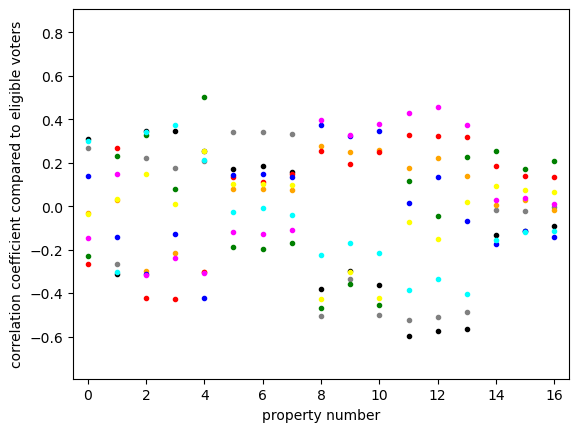

In [54]:
plt.plot(pop[2],corr1[0],'o',ms=3,color='gray',label='voters') 
plt.plot(pop[2],corr1[1],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(pop[2],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(pop[2],corr1[4],'o',ms=3,color='red',label='Social democrats') 
plt.plot(pop[2],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(pop[2],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(pop[2],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(pop[2],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(pop[2],corr1[9],'o',ms=3,color='cyan',label='others') 
#plt.legend(loc="best") too big improve add also labels and betetr symbols
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
plt.xlim(-0.5,16.5)
print(listg1[0:17])

Sinec for single there are clear difference we separate by gender. In contrast it seems rather similar for married, therefore we use married total there. This doe snot ncessary means it is the same but because married couples live usually together, census based analysis cannot separate them well. For widowed the coefficents are nearlky always blarger absolutely together than separated, thsu we use them togther. That could be just caused by low numbers. In contrast the some parties with clearly different trends for divorced, thus we separate them. Finally, we exclude male and female because the cases were they matter are already included previously. 

We now look on the age groups. 

['total_18_24', 'male_18_24', 'female_18_24', 'total_25_29', 'male_25_29', 'female_25_29', 'total_30_39', 'male_30_39', 'female_30_39', 'total_40_49', 'male_40_49', 'female_40_49', 'total_50_64', 'male_50_64', 'female_50_64', 'total_65_74', 'male_65_74', 'female_65_74', 'total_75_and_older', 'male_75_and_older', 'female_75_and_older']


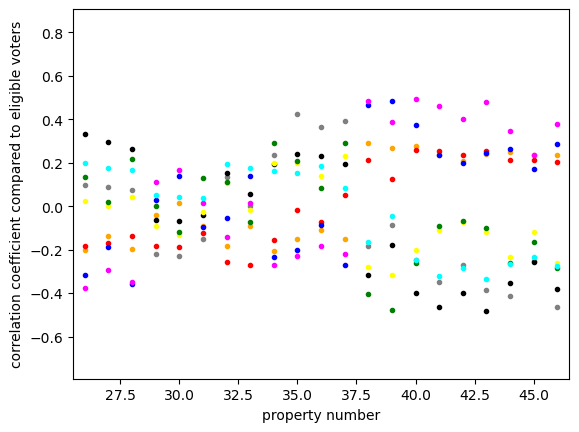

In [55]:

plt.plot(pop[2],corr1[0],'o',ms=3,color='gray',label='voters') 
plt.plot(pop[2],corr1[1],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(pop[2],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(pop[2],corr1[4],'o',ms=3,color='red',label='Social democrats') 
plt.plot(pop[2],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(pop[2],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(pop[2],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(pop[2],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(pop[2],corr1[9],'o',ms=3,color='cyan',label='others') 
#plt.legend(loc="best") too big improve add also labels and betetr symbols
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
plt.xlim(25.5,46.5)
print(listg1[26:47])

Since there are always some differences (least between 65 and 74) we use always the genders separately and discard the totals for the age groups.

Finally, we look on the citizen and religion properties

['citizen_german', 'birth_country_germany', 'birth_country_foreign', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'birth_country_other', 'religion_catholic', 'religion_protestant', 'religion_other']


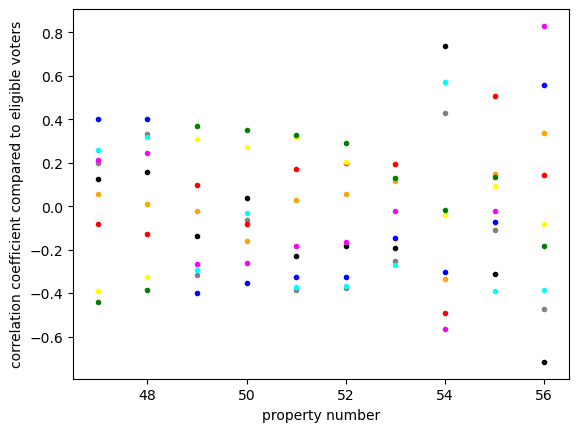

In [56]:
plt.plot(pop[2],corr1[0],'o',ms=3,color='gray',label='voters') 
plt.plot(pop[2],corr1[1],'o',ms=3,color='orange',label='not valid votes') 
plt.plot(pop[2],(corr1[3]),'o',ms=3,color='black',label='Christian union') 
plt.plot(pop[2],corr1[4],'o',ms=3,color='red',label='Social democrats') 
plt.plot(pop[2],corr1[5],'o',ms=3,color='blue',label='Alternative for Germany') 
plt.plot(pop[2],corr1[6],'o',ms=3,color='yellow',label='libertarian') 
plt.plot(pop[2],corr1[7],'o',ms=3,color='magenta',label='lefts') 
plt.plot(pop[2],corr1[8],'o',ms=3,color='green',label='greens') 
plt.plot(pop[2],corr1[9],'o',ms=3,color='cyan',label='others') 
#plt.legend(loc="best") too big improve add also labels and betetr symbols
plt.xlabel("property number")
plt.ylabel("correlation coefficient compared to eligible voters")
#plt.xscale("log")
plt.xlim(46.5,56.5)
print(listg1[47:57])

We discard citizen German since it is smaller than the birth country Germany and all voters should be citizens. We
exclude foreigen borth coiuntry since it is the negative of the former and use the eu27, other europe and other continents. We exclude other since it is unclear what is in it and the signal is small. All religions are kept since the have one of the largest signal. 

Further we discard some whose inclusion would lead too strong correlations between different features. Firstly, this is religion(other) which follows automatically when the other two are excluded. 

In [264]:
print(listg1)
listg2=['single_male', 'single_female', 'married_total', 'widowed_total','divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24',  'male_25_29', 'female_25_29',  'male_30_39', 'female_30_39',  'male_40_49', 'female_40_49',  'male_50_64', 'female_50_64',  'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older',  'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents',  'religion_catholic', 'religion_protestant']
print(len(listg2))
print(listg2)

['male', 'female', 'single_total', 'single_male', 'single_female', 'married_total', 'married_male', 'married_female', 'widowed_total', 'widowed_male', 'widowed_female', 'divorced_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'civil_union_male', 'civil_union_female', 'civil_union_widowed_total', 'civil_union_widowed_male', 'civil_union_widowed_female', 'civil_union_divorced_total', 'civil_union_divorced_male', 'civil_union_divorved_female', 'not_specified_total', 'not_specified_male', 'not_specified_female', 'total_18_24', 'male_18_24', 'female_18_24', 'total_25_29', 'male_25_29', 'female_25_29', 'total_30_39', 'male_30_39', 'female_30_39', 'total_40_49', 'male_40_49', 'female_40_49', 'total_50_64', 'male_50_64', 'female_50_64', 'total_65_74', 'male_65_74', 'female_65_74', 'total_75_and_older', 'male_75_and_older', 'female_75_and_older', 'citizen_german', 'birth_country_germany', 'birth_country_foreign', 'birth_country_eu27', 'birth_country_other_europe', 'birth_count

Now we are selecting the units whoch have good data for all the selected properties. 

In [265]:
sel3=sel2
#get clean section and the use linear regression
for i in range(len(listg2)):
    print(i)
    sel3=sel3[(comb1[listg2[i]]>-0.5) & (comb1['qual_'+listg2[i]]!=1)]

0
1
2
3
4
5
6
7
8
9
10


/tmp/ipykernel_7437/955859358.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sel3=sel3[(comb1[listg2[i]]>-0.5) & (comb1['qual_'+listg2[i]]!=1)]


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [59]:
print(len(sel2))
print(len(sel3))
print(sel2.population.sum())
print(sel3.population.sum())
#are now clearly less to checked whether that causes a problem
print(sel2.population.min())
print(sel3.population.min())
print(sel2.population.median())
print(sel3.population.median())

5088
2306
67862782
53267964
55
55
5113.0
10768.5


In [266]:
#next is doing linear regression
#select properties of party, votes and valid votes are very similar thus only one and is now refernce, since usually the share is given to votes
listp2=['eligible_voters','not_valid_votes_party_votes','christian_unions_party_votes','social_democrats_party_votes','alternative_for_germany_party_votes',
'libertarians_party_votes', 'lefts_party_votes','greens_party_votes','others_party_votes']
print(listp2)
#new reference is'valid_votes_party_votes'
#select features 
print(len(listg2))
feat=sel3.loc[:,[listg2[0],listg2[1]]]
print(sel3.loc[:,'population'])
feat.iloc[:,0]=feat.iloc[:,0]/sel3.loc[:,'population']*100
feat.iloc[:,1]=feat.iloc[:,1]/sel3.loc[:,'population']*100
for i in range(2,len(listg2)):
    feat[listg2[i]]=sel3.loc[:,[listg2[i]]]
    feat.iloc[:,i]=feat.iloc[:,i]/sel3.loc[:,'population']*100
print(feat)
#now the targets which are all of listp2
tar=sel3.loc[:,[listp2[0],listp2[1]]]
print(sel3.loc[:,'population'])
tar.iloc[:,0]=tar.iloc[:,0]/sel3.loc[:,'valid_votes_party_votes']*100
tar.iloc[:,1]=tar.iloc[:,1]/sel3.loc[:,'valid_votes_party_votes']*100
for i in range(2,len(listp2)):
    tar[listp2[i]]=sel3.loc[:,[listp2[i]]]
    tar.iloc[:,i]=tar.iloc[:,i]/sel3.loc[:,'valid_votes_party_votes']*100
print(tar)

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
27
0        82258
1       235782
2       210305
3        77249
4        12834
         ...  
9843     25267
9918      2290
9962      5024
9996     34090
9998     10964
Name: population, Length: 2331, dtype: int64
      single_male  single_female  married_total  widowed_total  divorced_male  \
0       25.266843      20.542683      37.775049       7.162829       3.698121   
1       25.517639      23.426725      35.537064       6.149324       3.733534   
2       22.003281      20.085114      40.743206       7.579468       3.782126   
3       21.844943      18.198294      42.988259       7.908193       3.962511   
4       20.531401      15.412186      48.675393       8.563192       3.031011   
...           ...            ...            ...       

Now we split into train and test set with the usual share of 80 to 20. 

In [287]:

feat_train,feat_test,tar_train, tar_test= train_test_split(feat,tar,train_size=0.80, shuffle=True, random_state=1)
print(f"shape of features in train {feat_train.shape}")
print(f"shape of features in test {feat_test.shape}")
#normalize the features  should use standard scaler
print(feat_train.iloc[:,0])
norm_feat_train=feat_train.copy()
norm_feat_test=feat_test.copy()
print(feat_train)
statg2=np.zeros((2,len(listg2)))
m=feat_train.iloc[:,0].mean()
s=feat_train.iloc[:,0].std()
statg2[0,0]=m
statg2[1,0]=s
norm_feat_train.iloc[:,0]=(feat_train.iloc[:,0]-m)/s
norm_feat_test.iloc[:,0]=(feat_test.iloc[:,0]-m)/s
for i in range(1,len(listg2)):
    m=feat_train.iloc[:,i].mean()
    s=feat_train.iloc[:,i].std()
    norm_feat_train.iloc[:,i]=(feat_train.iloc[:,i]-m)/s
    norm_feat_test.iloc[:,i]=(feat_test.iloc[:,i]-m)/s
    statg2[0,i]=m
    statg2[1,i]=s
print(norm_feat_test.mean())
print(norm_feat_test.std())
print(np.round(statg2.T,3))
print(feat_train)

shape of features in train (1864, 27)
shape of features in test (467, 27)
9343    20.356099
5603    22.697757
1991    19.446736
6920    20.547613
5776    23.074800
          ...    
4900    20.940936
4795    21.807676
5168    20.544164
1920    19.323083
5120    18.983446
Name: single_male, Length: 1864, dtype: float64
      single_male  single_female  married_total  widowed_total  divorced_male  \
9343    20.356099      14.562849      50.571353       9.274515       2.949774   
5603    22.697757      18.093270      47.240260       6.921488       2.272727   
1991    19.446736      16.345547      49.395778       8.197040       3.047804   
6920    20.547613      15.580325      49.769809       6.929973       3.464987   
5776    23.074800      18.906983      48.440519       4.968258       2.152912   
...           ...            ...            ...            ...            ...   
4900    20.940936      18.409614      49.117873       5.642206       2.471661   
4795    21.807676      18.647917

In [288]:
coefs=np.zeros((feat_test.shape[1]+1,len(listp2)+1))
coefs[:,9]=np.arange(0,feat_test.shape[1]+1,1)
predte=np.zeros((feat_test.shape[0],len(listp2)))
predtr=np.zeros((feat_train.shape[0],len(listp2)))
statlin=np.zeros((7,len(listp2)))
statlin[6,:]=np.arange(0,9,1)
for i in range(len(listp2)):
    print(i)
    reg = LinearRegression().fit(norm_feat_train, tar_train.iloc[:,i]) #fit results seem to be bad
    coefs[0:feat_test.shape[1],i]=reg.coef_
    print(reg.coef_)
    coefs[feat_test.shape[1],i]=reg.intercept_
    predtr[:,i]=reg.predict(norm_feat_train)    
    predte[:,i]=reg.predict(norm_feat_test)
    statlin[0,i]=tar_train.iloc[:,i].mean()
    statlin[1,i]=tar_train.iloc[:,i].std()  
    statlin[2,i]=np.std(tar_train.iloc[:,i]-predtr[:,i])   
    statlin[3,i]=tar_test.iloc[:,i].mean()
    statlin[4,i]=tar_test.iloc[:,i].std()  
    statlin[5,i]=np.std(tar_test.iloc[:,i]-predte[:,i])     
print(np.round(statlin.T,3))    

0
[-10.05842674 -10.59451048 -18.14373833  -3.49062418  -2.20346872
  -5.60669814  -0.76998221   0.207587     0.21293084  -0.60408921
  -0.18099232  -0.09029619  -1.74444261   0.11921598  -1.63544157
   0.98433132  -1.34728286  -0.32578638  -1.32248387  -1.39614396
  -1.64985189  -1.66443982  -0.71900933   1.43418821   1.52095714
  -4.7246741   -3.44978219]
1
[-0.26085356 -0.29639859 -0.43250411 -0.1896328  -0.03105162 -0.20859095
 -0.00229842 -0.02582439  0.0176823   0.0191341   0.00806936 -0.00215024
 -0.02528843  0.04301474 -0.02457064  0.05135176  0.0291106  -0.02822132
 -0.0296573   0.07132862 -0.03106566 -0.12112484 -0.11028926 -0.01723778
  0.03782209 -0.15885189 -0.08971043]
2
[ 3.05070057  3.47091584  5.54793742  3.45947861  0.37918792  1.35925419
  0.02616603  0.06533545 -0.3133478  -0.40173927 -0.50891284  0.03794109
 -0.26570427 -0.15931825 -0.46875239 -0.07389179 -0.84086497  0.46730797
 -0.03519904 -0.99945943 -0.15164743  0.05693854  0.74798563 -0.78614006
  0.27238808  

We now plot the standard deviation over the full data set and the one after subtracting the predictions. 

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


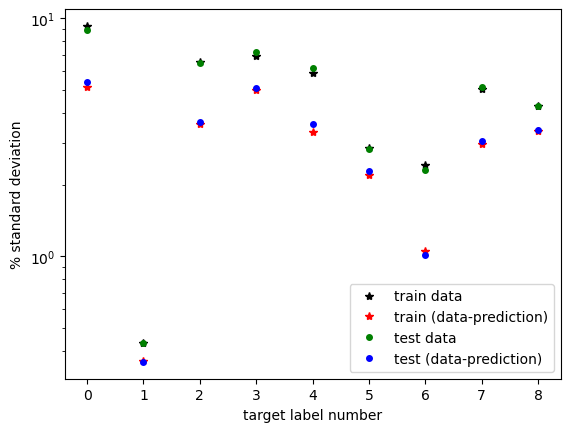

In [289]:
print(listp2)
plt.plot(statlin[6],statlin[1],'*',ms=6,color='black',label='train data') 
plt.plot(statlin[6],statlin[2],'*',ms=6,color='red',label='train (data-prediction)') 
plt.plot(statlin[6],statlin[4],'o',ms=4,color='green',label='test data') 
plt.plot(statlin[6],statlin[5],'o',ms=4,color='blue',label='test (data-prediction)') 
plt.legend(loc="best")
plt.ylabel("% standard deviation")
plt.xlabel("target label number")
plt.yscale("log")
#does not change after normnalization

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
[-0.84061129  0.3522698  -2.20885992 -2.98608063 -1.24774431  0.54634666
  0.49406971 -0.12554241 -0.01769959 -0.10126811  0.06299641 -0.40198257
  0.51289301 -0.26594293  1.04130118 -0.72809527  0.54358238  0.41641305
  0.15940414  0.85927298  0.32337211 -0.70832284  0.22319213  0.0696456
 -0.25616464  0.13871026  1.21799766 11.85661186]


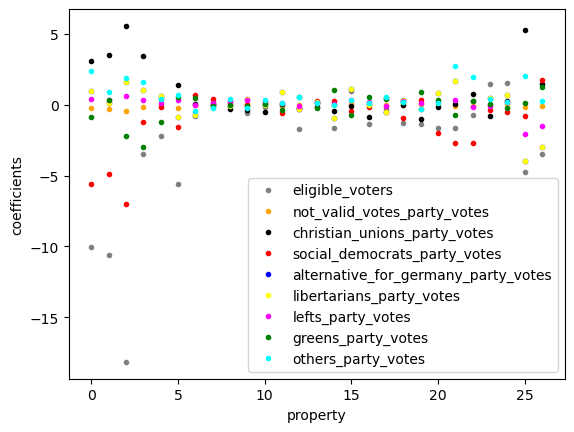

In [290]:
print(listg2)
plt.plot(coefs[0:27,9],coefs[0:27,0],'o',ms=3,color='gray',label=f'{listp2[0]}') 
plt.plot(coefs[0:27,9],coefs[0:27,1],'o',ms=3,color='orange',label=f'{listp2[1]}')
plt.plot(coefs[0:27,9],coefs[0:27,2],'o',ms=3,color='black',label=f'{listp2[2]}') 
plt.plot(coefs[0:27,9],coefs[0:27,3],'o',ms=3,color='red',label=f'{listp2[3]}')
plt.plot(coefs[0:27,9],coefs[0:27,4],'o',ms=3,color='blue',label=f'{listp2[4]}') 
plt.plot(coefs[0:27,9],coefs[0:27,4],'o',ms=3,color='yellow',label=f'{listp2[5]}')
plt.plot(coefs[0:27,9],coefs[0:27,6],'o',ms=3,color='magenta',label=f'{listp2[6]}') 
plt.plot(coefs[0:27,9],coefs[0:27,7],'o',ms=3,color='green',label=f'{listp2[7]}')
plt.plot(coefs[0:27,9],coefs[0:27,8],'o',ms=3,color='cyan',label=f'{listp2[8]}')
plt.legend(loc="best")
plt.ylabel("normalized coefficients")
plt.xlabel("property")
#plt.xscale("log")
#plt.yscale("log")
#something wrong all relegion positive for chrsiatin is wrong 
#now somewhat more differences and more seem irrelevant (all the ince which have small shares)
#values cahnge a lot here, prediction goodness less
print(coefs[0:29,7])

(1864, 9)


Text(0.5, 0, 'prediction')

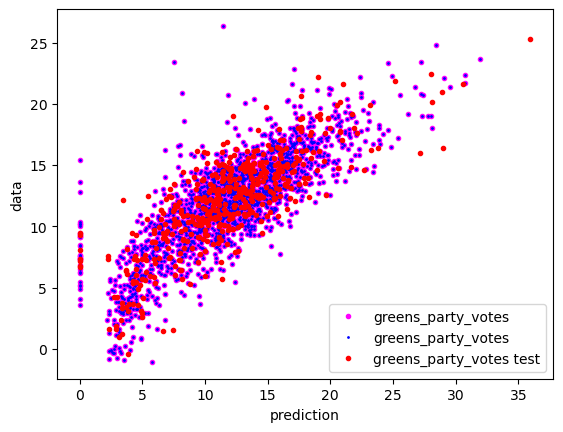

In [292]:
print(np.shape(predtr))
pg=coefs[27,7]+np.matmul(norm_feat_train,coefs[0:27,7]) #prediction works and does what it should but still strange numnbers
plt.plot(tar_train.iloc[:,7],predtr[:,7],'o',ms=3,color='magenta',label=f'{listp2[7]}') 
plt.plot(tar_train.iloc[:,7],pg,'o',ms=1,color='blue',label=f'{listp2[7]}') 
plt.plot(tar_test.iloc[:,7],predte[:,7],'o',ms=3,color='red',label=f'{listp2[7]} test') 
plt.legend(loc="best")
plt.ylabel("data")
plt.xlabel("prediction")
#prediction o.k. but seem that minors are not well done 
#seems like only get 

['eligible_voters', 'not_valid_votes_party_votes', 'christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']
['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']


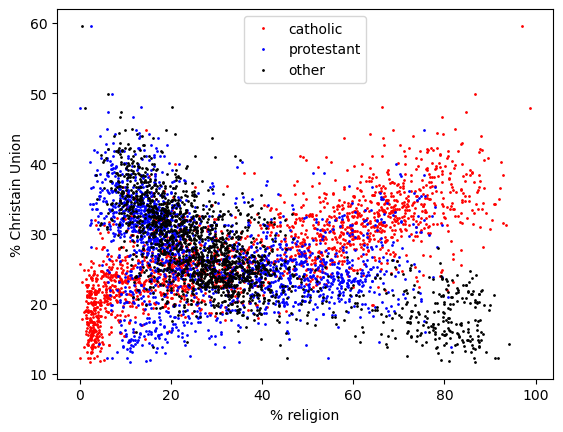

In [313]:
print(listp2)
plt.plot(feat_train['religion_catholic'],tar_train['christian_unions_party_votes'],'o',ms=1,color='red',label='catholic')
plt.plot(feat_train['religion_protestant'],tar_train['christian_unions_party_votes'],'o',ms=1,color='blue',label='protestant') 
plt.plot(100-feat_train['religion_catholic']-feat_train['religion_protestant'],tar_train['christian_unions_party_votes'],'o',ms=1,color='black',label='other')
plt.legend(loc="best")
plt.xlabel("% religion")
plt.ylabel("% Christain Union")
#plt.xscale("log")
#plt.yscale("log")
print(listg2)
#plot seems right why tehn coeeficient wrong? 

For most properties until now only few rather small countries are missing. This is no different for extreme poverty. We check how that relates with GDP per capita. 

In [295]:
reg = RandomForestRegressor(random_state=1,max_samples=0.5)
statfor=np.zeros((5,len(listp2)))
for i in range(0, len(listp2)):  
    statfor[0,i]=i
    print(listp2[i])

    reg.fit(feat_train,tar_train.iloc[:,i])
    predtr= reg.predict(feat_train)
    predte= reg.predict(feat_test)  
    statfor[1,i]=np.std(tar_train.iloc[:,i])    
    statfor[2,i]=np.std(predtr-tar_train.iloc[:,i])
    statfor[3,i]=np.std(tar_test.iloc[:,i])    
    statfor[4,i]=np.std(predte-tar_test.iloc[:,i])   

eligible_voters
not_valid_votes_party_votes
christian_unions_party_votes
social_democrats_party_votes
alternative_for_germany_party_votes
libertarians_party_votes
lefts_party_votes
greens_party_votes
others_party_votes


[[0.    9.274 3.161 8.931 5.04 ]
 [1.    0.43  0.215 0.432 0.344]
 [2.    6.515 2.08  6.482 3.333]
 [3.    6.931 2.627 7.194 4.251]
 [4.    5.898 1.835 6.167 3.082]
 [5.    2.856 1.227 2.825 1.942]
 [6.    2.417 0.647 2.309 0.899]
 [7.    5.028 1.595 5.121 2.444]
 [8.    4.288 1.641 4.257 2.511]]


Text(0.5, 0, 'target label number')

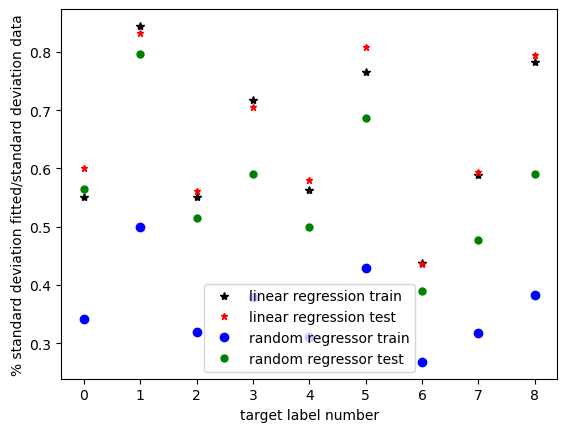

In [297]:
    
print(np.round(statfor.T,3))
plt.plot(statlin[6],statlin[2]/statlin[1],'*',ms=6,color='black',label='linear regression train') 
plt.plot(statlin[6],statlin[5]/statlin[4],'*',ms=5,color='red',label='linear regression test') 
plt.plot(statfor[0],statfor[2]/statfor[1],'o',ms=6,color='blue',label='random regressor train') 
plt.plot(statfor[0],statfor[4]/statfor[3],'o',ms=5,color='green',label='random regressor test') 
plt.legend(loc="best")
plt.ylabel("% standard deviation fitted/standard deviation data")
plt.xlabel("target label number")
#plt.yscale("log")
#random rgessor better bit not much still unclear why coefficent are as they are

In [312]:
#get coefs start with religions assume independence of others 
#normalized means that mean values are already the base
rel=np.zeros((3,9))
for i in range(9):
    rel[0,i]=coefs[27,i]+coefs[25,i]*(100-statg2[0,25])/statg2[1,25]+coefs[26,i]*(0-statg2[0,26])/statg2[1,26]
    rel[1,i]=coefs[27,i]+coefs[25,i]*(0-statg2[0,25])/statg2[1,25]+coefs[26,i]*(100-statg2[0,26])/statg2[1,26]
    rel[2,i]=coefs[27,i]+coefs[25,i]*(0-statg2[0,25])/statg2[1,25]+coefs[26,i]*(0-statg2[0,26])/statg2[1,26]    
print(rel)
print(statg2[0,25])

[[124.78592746   0.65491742  37.2527003   19.74619808   6.79178659
   10.61131998   1.24400099  10.24897163  14.10502242]
 [124.22223195   0.77544422  25.32239117  31.8802695    5.73294114
   12.1445898    0.93075719  16.19301468   7.79603652]
 [142.53355908   1.25162415  17.56225075  22.82762697  21.73345381
   12.61930658   8.98643728   9.72792433   6.54300029]]
37.963662304887514


['christian_unions_party_votes', 'social_democrats_party_votes', 'alternative_for_germany_party_votes', 'libertarians_party_votes', 'lefts_party_votes', 'greens_party_votes', 'others_party_votes']


Text(0.5, 1.0, 'catholic')

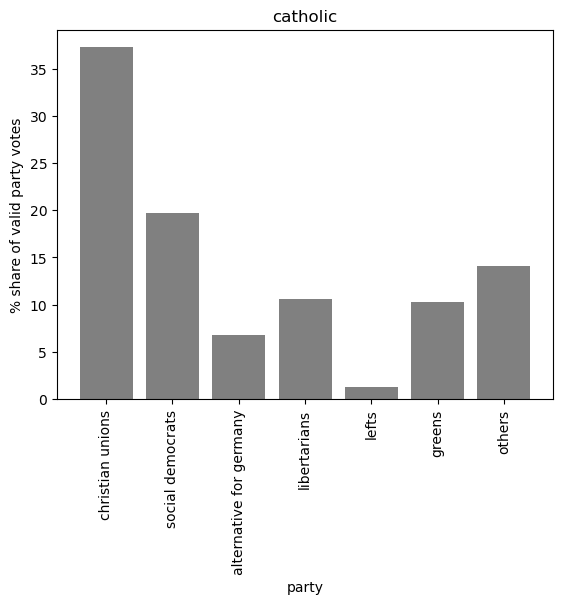

In [322]:
print(listp2[2:9])
listp3=['christian unions', 'social democrats', 'alternative for germany', 'libertarians', 'lefts', 'greens', 'others']
plt.bar(listp3,rel[0,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation='vertical')
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("catholic")

Text(0.5, 1.0, 'protestants')

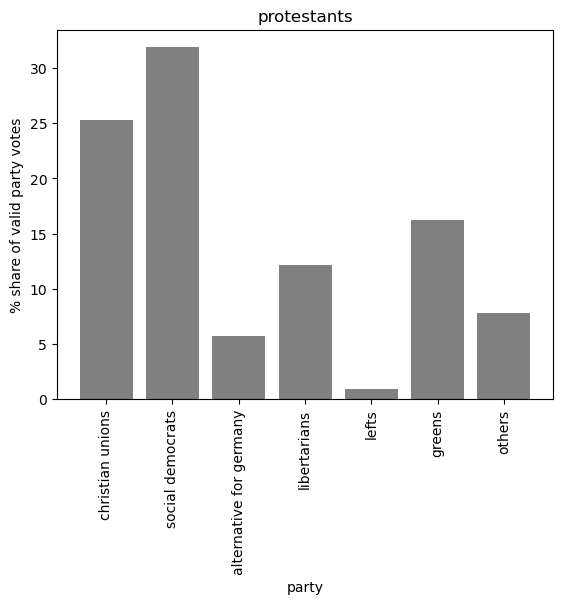

In [323]:
plt.bar(listp3,rel[1,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation='vertical')
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("protestants")

Text(0.5, 1.0, 'none or other religion')

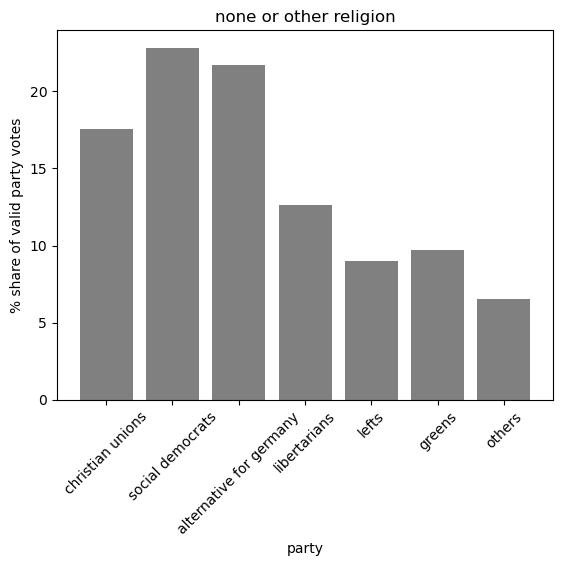

In [328]:
plt.bar(listp3,rel[2,2:9],color='gray') 
#plt.legend(loc="best")
plt.xticks(rotation=45)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("none or other religion")

Text(0.5, 1.0, 'religion')

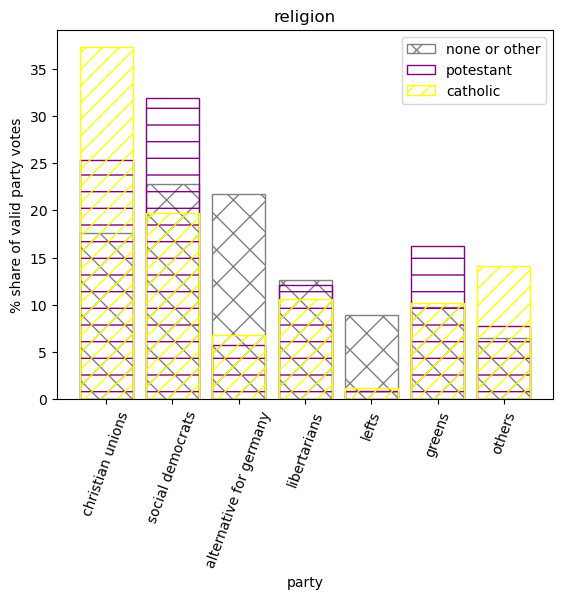

In [339]:
plt.bar(listp3,rel[2,2:9],facecolor='none',edgecolor='gray',hatch='\\/',label='none or other') 
plt.bar(listp3,rel[1,2:9],facecolor='none',edgecolor='purple',hatch='-',label='potestant') 
plt.bar(listp3,rel[0,2:9],facecolor='none',edgecolor='yellow',hatch='//',label='catholic') 
plt.legend(loc="best")
plt.xticks(rotation=70)
plt.ylabel("% share of valid party votes")
plt.xlabel("party")
plt.title("religion")


In [354]:
#status
print(listg2)
rel=np.zeros((7,9))
for i in range(9):
    rel[0,i]=coefs[27,i]+coefs[0,i]*(100-statg2[0,0])/statg2[1,0]+coefs[1,i]*(0-statg2[0,1])/statg2[1,1]+coefs[2,i]*(0-statg2[0,2])/statg2[1,2]+coefs[3,i]*(0-statg2[0,3])/statg2[1,3]+coefs[4,i]*(0-statg2[0,4])/statg2[1,4]+coefs[5,i]*(0-statg2[0,5])/statg2[1,5]+coefs[6,i]*(0-statg2[0,6])/statg2[1,6] 
print(rel)
#gets negative cote shares clear that diffiucl since variation is not giant
print(np.round(statg2[:,0:7],3))
print(statg2[0,6])

['single_male', 'single_female', 'married_total', 'widowed_total', 'divorced_male', 'divorced_female', 'civil_union_total', 'male_18_24', 'female_18_24', 'male_25_29', 'female_25_29', 'male_30_39', 'female_30_39', 'male_40_49', 'female_40_49', 'male_50_64', 'female_50_64', 'male_65_74', 'female_65_74', 'male_75_and_older', 'female_75_and_older', 'birth_country_germany', 'birth_country_eu27', 'birth_country_other_europe', 'birth_country_other_continents', 'religion_catholic', 'religion_protestant']
[[108.73378398   0.49065118  20.66044715 -69.13388632  26.46403193
   17.49490894   4.58567938  23.73105306  76.19776587]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0. 